# PROJET FINAL D'ANALYSE DE DONNES ET VISUALISATION

Réalisé par AMEZZIANE Fatine et SACI Douaa.
L2 Mathématiques.

---


### Ce projet est sur une base de données comportant des informations sur les salariés travaillant dans la data science.





Importation de toutes les librairies nécessaires pour ce code :



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import  r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

## PARTIE I : Analyse de Données

---


### 1.Préparation des données :

In [2]:
# Importation des données et infos de base afin de comprendre notre base de données
datascience = pd.read_csv('ds_salaries.csv', sep=';')

# Affichage des premières lignes de la base de données
print('DATASCIENCE PAS ENCORE NETTOYÉ', datascience.head())

# Affichage des noms des colonnes
print(datascience.columns)

# Affichage des informations sur la base de données (nombre de lignes, de colonnes, types de données, etc.)
print(datascience.info())

# Affichage des statistiques descriptives pour les colonnes numériques
print(datascience.describe())

# Affichage du nombre de données dans la base de données
print(len(datascience))

# Affichage de la forme (shape) de la base de données (nombre de lignes, nombre de colonnes)
print(datascience.shape)

# Affichage de la taille (nombre total d'éléments) de la base de données
print(datascience.size)

DATASCIENCE PAS ENCORE NETTOYÉ    work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES   

#### Nettoyage de la base de données :

In [3]:
# Vérifier les valeurs manquantes du tableau
val_manquantes = {}
for colonne in datascience.columns:
    nb_manquantes = datascience[colonne].isnull().sum()
    val_manquantes[colonne] = nb_manquantes
# Affichage du nombre de valeurs manquantes pour chaque colonne
print(val_manquantes)
# Condition dans le cas où le nombre de valeurs manquantes par colonne dépasse 80%
prb_colonnes = []
for colonne, nb_manquantes in val_manquantes.items():
    if nb_manquantes > 0.8 * len(datascience):
        prb_colonnes.append(colonne)
# Afficher les colonnes problématiques
print("Colonnes problématiques en raison de valeurs manquantes : ", prb_colonnes)
# On fait en sorte que la colonne 'work_year' soit au bon format
datascience['work_year'] = pd.to_datetime(datascience['work_year'], errors='coerce', format='%Y')
# (i) Remplacer les valeurs manquantes par la moyenne (exemple pour une colonne numérique)
datascience['salary'] = datascience['salary'].fillna(datascience['salary'].mean())
datascience['salary_in_usd'] = datascience['salary_in_usd'].fillna(datascience['salary_in_usd'].mean())
# (ii) Remplacer les valeurs manquantes par le maximum ou le minimum (pour les colonnes numériques)
datascience['remote_ratio'] = datascience['remote_ratio'].fillna(datascience['remote_ratio'].min())
# (iii) Remplacer les valeurs manquantes par le mot « NULL » (exemple pour une colonne de texte)
datascience['job_title'] = datascience['job_title'].fillna('NULL')
datascience['employment_type'] = datascience['employment_type'].fillna('NULL')
datascience['employee_residence'] = datascience['employee_residence'].fillna('NULL')
datascience['company_location'] = datascience['company_location'].fillna('NULL')
# (iv) Remplacer par la valeur qui apparaît le plus souvent
datascience['experience_level'] = datascience['experience_level'].fillna(datascience['experience_level'].mode()[0])
datascience['salary_currency'] = datascience['salary_currency'].fillna(datascience['salary_currency'].mode()[0])
datascience['company_size'] = datascience['company_size'].fillna(datascience['company_size'].mode()[0])

{'work_year': np.int64(0), 'experience_level': np.int64(0), 'employment_type': np.int64(0), 'job_title': np.int64(0), 'salary': np.int64(0), 'salary_currency': np.int64(0), 'salary_in_usd': np.int64(0), 'employee_residence': np.int64(0), 'remote_ratio': np.int64(0), 'company_location': np.int64(0), 'company_size': np.int64(0)}
Colonnes problématiques en raison de valeurs manquantes :  []


#### Création et affichage du DataFrame nettoyé :

In [4]:
datascience2 = datascience.drop(prb_colonnes, axis=1)
print(datascience2.head(10))

   work_year experience_level employment_type                 job_title  \
0 2023-01-01               SE              FT  Principal Data Scientist   
1 2023-01-01               MI              CT               ML Engineer   
2 2023-01-01               MI              CT               ML Engineer   
3 2023-01-01               SE              FT            Data Scientist   
4 2023-01-01               SE              FT            Data Scientist   
5 2023-01-01               SE              FT         Applied Scientist   
6 2023-01-01               SE              FT         Applied Scientist   
7 2023-01-01               SE              FT            Data Scientist   
8 2023-01-01               SE              FT            Data Scientist   
9 2023-01-01               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000           

### 2.Analyse de donées :


In [5]:
#INFOS DU DATAFRAME NETTOYÉ
print('datascience2 NETTOYÉ : colonnes' , datascience2.columns)
print(datascience2.info())
print(datascience2.describe())
print(len(datascience2))
print(datascience2.shape)
print(datascience2.size)


datascience2 NETTOYÉ : colonnes Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           3755 non-null   datetime64[ns]
 1   experience_level    3755 non-null   object        
 2   employment_type     3755 non-null   object        
 3   job_title           3755 non-null   object        
 4   salary              3755 non-null   int64         
 5   salary_currency     3755 non-null   object        
 6   salary_in_usd       3755 non-null   int64         
 7   employee_residence  3755 non-null   object        
 8   remote_ratio        3755 non-null   int64         
 9   company_loc

#### Affichage des différentes possibilités de réponse pour chaque colonne :
##### Le but : déterminer les boxplots et histogrammes les plus pertinents en fonction des réponses.

In [6]:
for colonne in datascience.columns:
    print("Colonne :", colonne)
    print("Nombre de possibilités :", len(datascience2[colonne].unique()))
    print(datascience2[colonne].unique())
    print()

Colonne : work_year
Nombre de possibilités : 4
<DatetimeArray>
['2023-01-01 00:00:00', '2022-01-01 00:00:00', '2020-01-01 00:00:00',
 '2021-01-01 00:00:00']
Length: 4, dtype: datetime64[ns]

Colonne : experience_level
Nombre de possibilités : 4
['SE' 'MI' 'EN' 'EX']

Colonne : employment_type
Nombre de possibilités : 4
['FT' 'CT' 'FL' 'PT']

Colonne : job_title
Nombre de possibilités : 93
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Ma


#### Création d'un boxplot pour la colonne "salary_in_usd" :

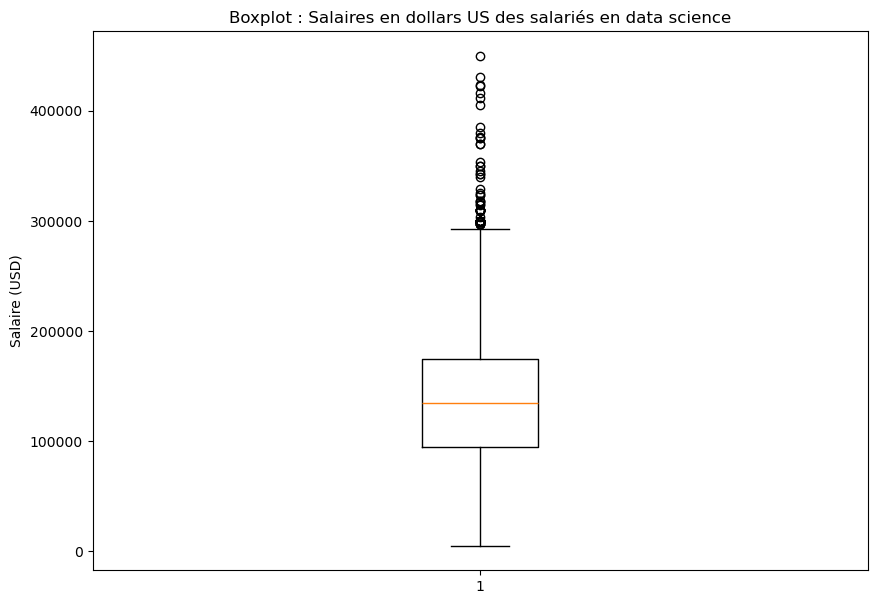

In [7]:
plt.figure(figsize=(10, 7))
plt.boxplot(datascience2['salary_in_usd'])
plt.title('Boxplot : Salaires en dollars US des salariés en data science' )
plt.ylabel('Salaire (USD)')
plt.show()

#### Calcul des moustaches haute et moustache basse :

In [8]:
Q1 = datascience2['salary_in_usd'].quantile(0.25)
Q3 = datascience2['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
moustachebasse = Q1 - 1.5 * IQR
moustachehaute = Q3 + 1.5 * IQR
print('Moustache basse : ', moustachebasse)
print('1er quartile : ',Q1)
print('3e quartile :', Q3)
print('IQR :', IQR)
print('Moustache haute : ', moustachehaute)

Moustache basse :  -25000.0
1er quartile :  95000.0
3e quartile : 175000.0
IQR : 80000.0
Moustache haute :  295000.0


#### Compter le nombre de valeurs aberrantes du boxplot :

In [9]:
nombre_valeurs_aberrantes = 0
for valeur in datascience2['salary_in_usd']:
    if valeur < moustachebasse or valeur > moustachehaute:
        nombre_valeurs_aberrantes += 1

print("Nombre de valeurs aberrantes :", nombre_valeurs_aberrantes)

Nombre de valeurs aberrantes : 63



*   63 val aberrantes, nombre relaivement faible car il y a 3755 données par colonne.
*   Seule corrélation numérique "pour le moment" : celle entre "salary" et "salary_in_usd".



In [10]:
correlation1 = datascience2['salary'].corr(datascience2['salary_in_usd'])
print("Corrélation entre 'salary' et 'salary_in_usd' :", correlation1)

Corrélation entre 'salary' et 'salary_in_usd' : -0.023675813981249287



*   Le coef affiché : -0.023675813981249263.


*   On aimerait calculer une "corrélation" entre "employee_residence" et "company_location" mais ce sont des valeurs non numériques.
*   Importation de la bibliothèque "LabelEncoder" présente dans la bibliothèque "sklearn" deja rencontrée auparavant.

#### Convertir les variables catégorielles en variables numériques :



In [11]:
label_encoder = LabelEncoder()
datascience2['employee_residence_encoded'] = label_encoder.fit_transform(datascience2['employee_residence'])
datascience2['company_location_encoded'] = label_encoder.fit_transform(datascience2['company_location'])
correlation2 = np.corrcoef(datascience2['employee_residence_encoded'], datascience2['company_location_encoded'])[0, 1]
print("Approximation de la corrélation entre 'employee_residence' et 'company_location' :", correlation2)

Approximation de la corrélation entre 'employee_residence' et 'company_location' : 0.9456758551105574



*   Corrélation : 0.9456758551105585

In [12]:
corr1= -0.023675813981249263
corr2= 0.9456758551105585

#### PLOT pour mettre en avant ces 2 corrélations calculées :

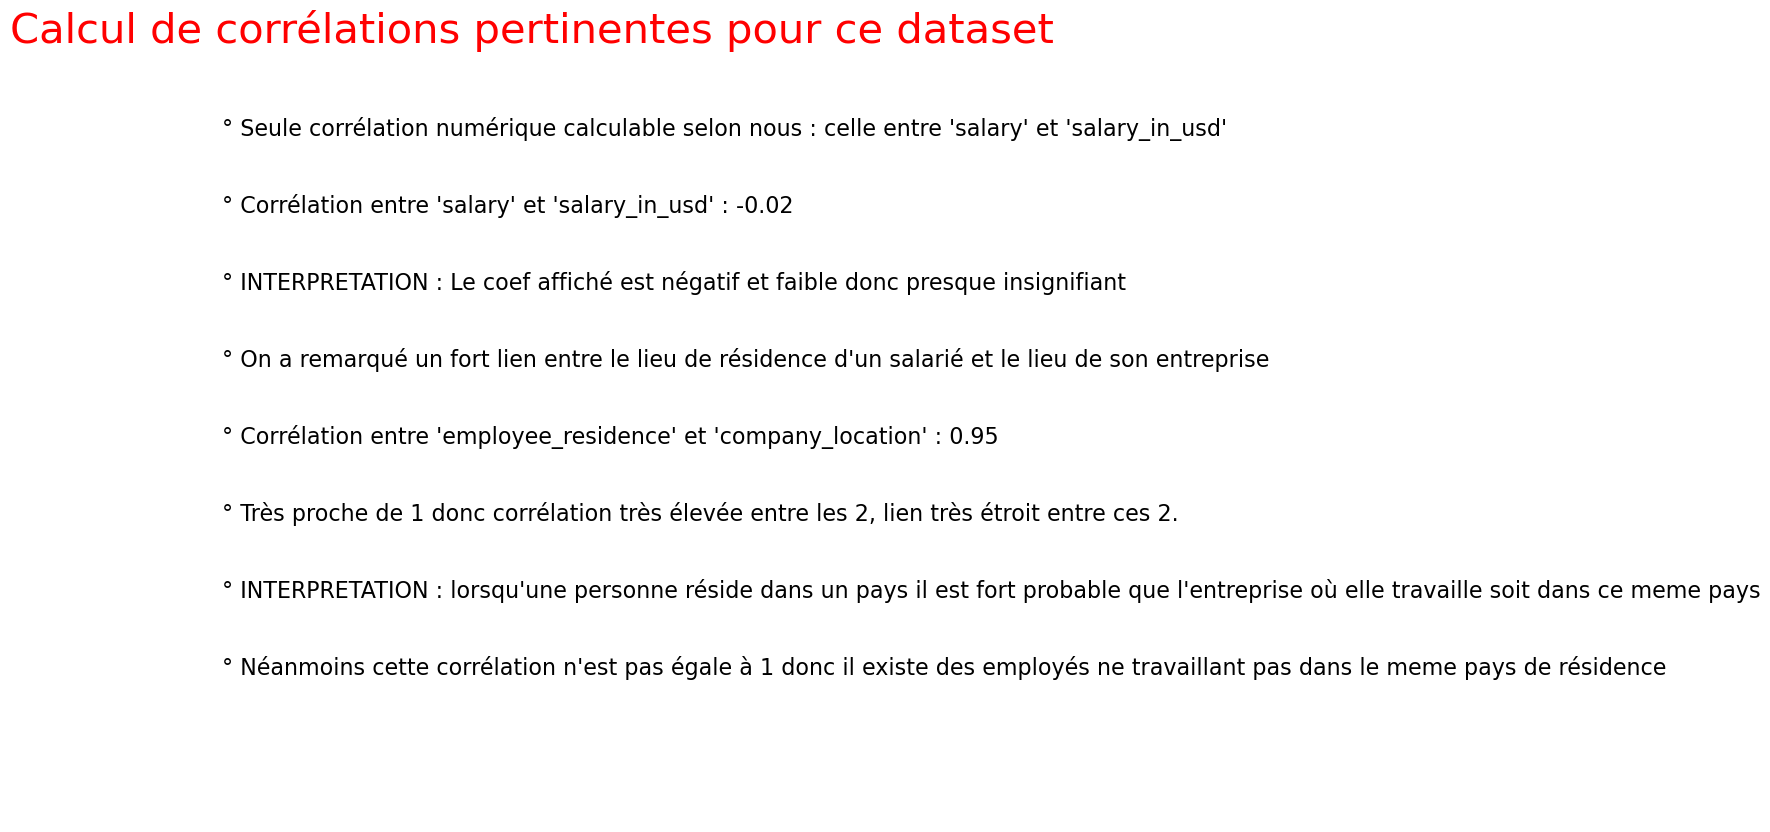

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.title('Calcul de corrélations pertinentes pour ce dataset', fontsize=30, color='red')
# Ajout des lignes de texte
text_lines = [
    "° Seule corrélation numérique calculable selon nous : celle entre 'salary' et 'salary_in_usd'",
    f"° Corrélation entre 'salary' et 'salary_in_usd' : {corr1:.2f}",
    "° INTERPRETATION : Le coef affiché est négatif et faible donc presque insignifiant",
    "° On a remarqué un fort lien entre le lieu de résidence d'un salarié et le lieu de son entreprise",
    f"° Corrélation entre 'employee_residence' et 'company_location' : {corr2:.2f}",
    "° Très proche de 1 donc corrélation très élevée entre les 2, lien très étroit entre ces 2.",
    "° INTERPRETATION : lorsqu'une personne réside dans un pays il est fort probable que l'entreprise où elle travaille soit dans ce meme pays",
    "° Néanmoins cette corrélation n'est pas égale à 1 donc il existe des employés ne travaillant pas dans le meme pays de résidence"
]

# Positionnement du texte
for i, line in enumerate(text_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, ha='left', va='center', color='black', fontsize=16)

ax.axis('off')
plt.show()



### 3.Extraction des connaissances :


1ERE ETUDE : création d'un PIE CHART en ayant observé le boxplot, nous souhaitons observer la répartition de la masse salariale totale entre les 4 quartiles.
*   On souhaite montrer par ex que le 4e quartile regroupe à lui seul une grande partie de la masse salariale totale.
*   Objectif : mettre en avant l'écart qu'il peut y avoir entre les différents métiers (et leur salaire associé) de cette base de données.

In [14]:
Q1 = datascience2['salary_in_usd'].quantile(0.25)
median = datascience2['salary_in_usd'].quantile(0.5)
Q3 = datascience2['salary_in_usd'].quantile(0.75)

#### Calcul des salaires dans chaque quartile :

In [15]:
Q1_salaries = datascience2[datascience2['salary_in_usd'] <= Q1]['salary_in_usd'].sum()
Q2_salaries = datascience2[(datascience2['salary_in_usd'] > Q1) & (datascience2['salary_in_usd'] <= median)]['salary_in_usd'].sum()
Q3_salaries = datascience2[(datascience2['salary_in_usd'] > median) & (datascience2['salary_in_usd'] <= Q3)]['salary_in_usd'].sum()
Q4_salaries = datascience2[datascience2['salary_in_usd'] > Q3]['salary_in_usd'].sum()

#### Présentation du PIE CHART pour la répartition de la masse salariale :

In [ ]:
labels = ['1er quartile', '2e quartile', '3e quartile', '4e quartile']
sizes = [Q1_salaries, Q2_salaries, Q3_salaries, Q4_salaries]
colors = ['orange','lightblue','lightgreen','red']
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition de la masse salariale totale dans les quartiles')
plt.axis('equal')
#pour que le pie chart soit bien un cercle

(np.float64(-1.099999985034595),
 np.float64(1.099999748184243),
 np.float64(-1.0999990142109055),
 np.float64(1.0999931917462449))

INTERPRETATION :
*   le 4e quartile regroupe à lui seul presque 40% de la masse salariale totale.
*   On remarque très bien l'écart qu'il peut y avoir entre les différents métiers (et leur salaire associé) de cette base de données.
*   Il est intéressant de s'interesser maintenant aux métiers présent dans le 4e quartile.
*   Ce sont par def les gens les plus aisés et le 4e quartile comprend les 63 valeurs abérrantes.

DEUXIEME ETUDE :
#### ETAPE 1 :
*   Extraction des informations des 63 plus riches du tableau :


In [ ]:
# Trier le DataFrame par ordre décroissant de la colonne 'salary_in_usd'
datascience_sorted = datascience2.sort_values(by='salary_in_usd', ascending=False)

# Extraire les 63 premières lignes
top_63_rich = datascience_sorted.head(63)

# Afficher les lignes correspondantes
print(top_63_rich.head())


      work_year experience_level employment_type  \
3522 2020-01-01               MI              FT   
2011 2022-01-01               MI              FT   
528  2023-01-01               SE              FT   
3747 2021-01-01               MI              FT   
3675 2021-01-01               EX              CT   

                               job_title   salary salary_currency  \
3522                  Research Scientist   450000             USD   
2011                        Data Analyst   350000             GBP   
528                         AI Scientist  1500000             ILS   
3747  Applied Machine Learning Scientist   423000             USD   
3675            Principal Data Scientist   416000             USD   

      salary_in_usd employee_residence  remote_ratio company_location  \
3522         450000                 US             0               US   
2011         430967                 GB             0               GB   
528          423834                 IL             0 

*   Remarque : il y a 13 colonnes dans ce tableau du au calcul de la "corrélation"entre "company_location" et "employee_residence".

#### ETAPE 2 :
*  voir les métiers différents de ces 63 ainsi que leur occurence dans cette liste :

In [ ]:
# Compter le nombre de réponses différentes dans la colonne "job_title"
occurrences_par_metier = top_63_rich['job_title'].value_counts()
print("Colonne : job_title")
print("Nombre de possibilités :", len(top_63_rich['job_title'].unique()))
print(top_63_rich['job_title'].value_counts())
print()


Colonne : job_title
Nombre de possibilités : 20
job_title
Data Engineer                         16
Data Scientist                        10
Data Science Manager                   7
Machine Learning Engineer              6
Research Scientist                     4
Applied Scientist                      3
Data Analyst                           2
Data Architect                         2
Director of Data Science               2
AI Scientist                           1
Applied Machine Learning Scientist     1
Principal Data Scientist               1
Machine Learning Software Engineer     1
Data Science Tech Lead                 1
Data Analytics Lead                    1
Applied Data Scientist                 1
Head of Data                           1
Computer Vision Engineer               1
Head of Data Science                   1
AI Developer                           1
Name: count, dtype: int64



#### ETAPE 3 :    
*  Création d'un HISTOGRAMME pour bien illustrer tout ça :

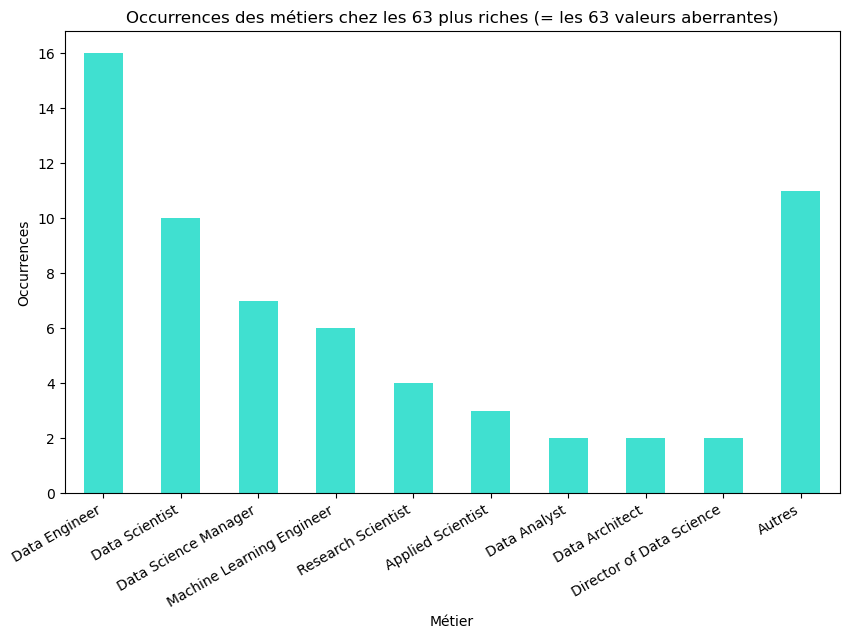

In [ ]:
# Regroupement des métiers avec une seule occurrence sous la catégorie "Autres"
occurrences_par_metier['Autres'] = occurrences_par_metier[occurrences_par_metier == 1].sum()
occurrences_par_metier = occurrences_par_metier[occurrences_par_metier > 1]

plt.figure(figsize=(10, 6))
occurrences_par_metier.plot(kind='bar', color='turquoise')
plt.title('Occurrences des métiers chez les 63 plus riches (= les 63 valeurs aberrantes)')
plt.xlabel('Métier')
plt.ylabel('Occurrences')
plt.xticks(rotation=30, ha='right')
plt.show()

*  Remarque : On remarque donc que parmi les 63 plus aisés, 16 sont Data Engineer --> 25,4% donc part importante.

In [ ]:
#Calcul du salaire moyen par métier dans les 63 premiers métiers
salaire_moyen_par_metier_63 = top_63_rich.groupby('job_title')['salary_in_usd'].mean()
# Création d'un nouveau tableau sans les 63 salaires les plus élevés
datascience2_sans_top63 = datascience2[~datascience2.index.isin(top_63_rich.index)]
# Calcul du salaire moyen global par métier dans le nouveau tableau
salaire_moyen_par_metier_nouveau = datascience2_sans_top63.groupby('job_title')['salary_in_usd'].mean()

*   Comparaison des salaires moyens par métier :

In [ ]:
for metier in salaire_moyen_par_metier_63.index:
    salaire_moyen_63 = salaire_moyen_par_metier_63[metier]
    salaire_moyen_nouveau = salaire_moyen_par_metier_nouveau.get(metier, 0)
    if salaire_moyen_nouveau == 0:
        print(f"Le métier '{metier}' n'est pas présent dans le nouveau tableau.")
    else:
        print(f"Salaire moyen pour le métier '{metier}' dans les 63 premiers métiers : {salaire_moyen_63}")
        print(f"Salaire moyen global pour le métier '{metier}' dans le nouveau tableau : {salaire_moyen_nouveau}")
        print("Comparaison :")
        if salaire_moyen_63 > salaire_moyen_nouveau:
            print("Le salaire moyen dans les 63 premiers métiers est supérieur au salaire moyen global dans le nouveau tableau.")
        elif salaire_moyen_63 < salaire_moyen_nouveau:
            print("Le salaire moyen dans les 63 premiers métiers est inférieur au salaire moyen global dans le nouveau tableau.")
        else:
            print("Le salaire moyen dans les 63 premiers métiers est égal au salaire moyen global dans le nouveau tableau.")
        print()

Salaire moyen pour le métier 'AI Developer' dans les 63 premiers métiers : 300000.0
Salaire moyen global pour le métier 'AI Developer' dans le nouveau tableau : 120332.7
Comparaison :
Le salaire moyen dans les 63 premiers métiers est supérieur au salaire moyen global dans le nouveau tableau.

Salaire moyen pour le métier 'AI Scientist' dans les 63 premiers métiers : 423834.0
Salaire moyen global pour le métier 'AI Scientist' dans le nouveau tableau : 89206.66666666667
Comparaison :
Le salaire moyen dans les 63 premiers métiers est supérieur au salaire moyen global dans le nouveau tableau.

Salaire moyen pour le métier 'Applied Data Scientist' dans les 63 premiers métiers : 380000.0
Salaire moyen global pour le métier 'Applied Data Scientist' dans le nouveau tableau : 84140.33333333333
Comparaison :
Le salaire moyen dans les 63 premiers métiers est supérieur au salaire moyen global dans le nouveau tableau.

Salaire moyen pour le métier 'Applied Machine Learning Scientist' dans les 63 pr

*   Les résultats sont affichés dans la console, on utilise ces résultats pour créer un histogramme pour l'esthetique.
*   Saisie longue des 20 résultats (car 20 métiers dans les 63).

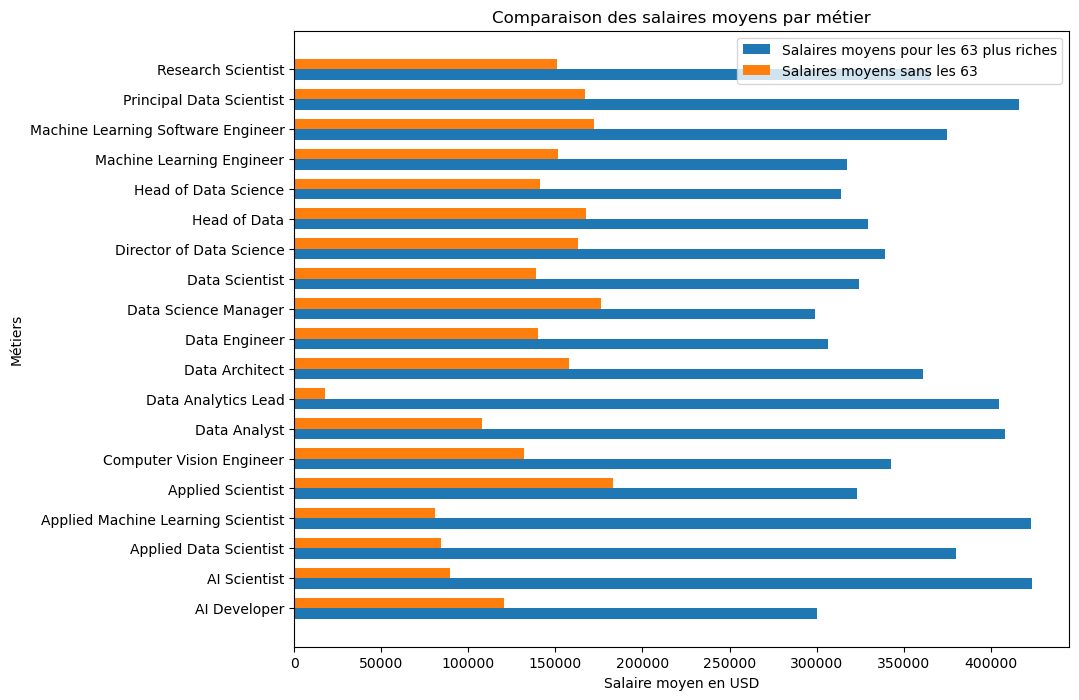

In [ ]:
metiers = ['AI Developer', 'AI Scientist', 'Applied Data Scientist', 'Applied Machine Learning Scientist',
           'Applied Scientist', 'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Lead', 'Data Architect',
           'Data Engineer', 'Data Science Manager', 'Data Scientist', 'Director of Data Science', 'Head of Data',
           'Head of Data Science', 'Machine Learning Engineer', 'Machine Learning Software Engineer',
           'Principal Data Scientist', 'Research Scientist']
salaires_63 = [300000.0, 423834.0, 380000.0, 423000.0, 322933.3333333333, 342810.0, 407983.5, 405000.0, 360840.0,
               306656.25, 299257.14285714284, 324145.0, 339100.0, 329500.0, 314100.0, 317700.0, 375000.0, 416000.0,
               365000.0]
salaires_globaux = [120332.7, 89206.66666666667, 84140.33333333333, 80948.54545454546, 183028.0, 131814.11764705883,
                    107735.02295081968, 17509.0, 157691.0202020202, 140225.2578125, 176458.21568627452,
                    138661.63012048192, 163149.77777777778, 167675.0, 141403.125, 151234.6996466431,
                    172133.33333333334, 167052.7142857143, 150763.64102564103]

# Création de l'higtogramme
fig, ax = plt.subplots(figsize=(10, 8))
largeur = 0.35
indices = range(len(metiers))
rects1 = ax.barh(indices, salaires_63, largeur, label='Salaires moyens pour les 63 plus riches')
rects2 = ax.barh([i + largeur for i in indices], salaires_globaux, largeur, label='Salaires moyens sans les 63')
ax.set_ylabel('Métiers')
ax.set_xlabel('Salaire moyen en USD')
ax.set_title('Comparaison des salaires moyens par métier')
ax.set_yticks([i + largeur / 2 for i in indices])
ax.set_yticklabels(metiers)
ax.legend()
plt.show()


INTERPRETATION :    

*   On constate qu'il y a un énorme écart pour chaque métier, cela est presque anormal.
*   Les 63 plus riches gagnent nettement plus que la moyenne.


---


Après une grande étude de ces valeurs aberrantes nous allons nous concentrer maintenant sur le nouveau tableau sans les 63 valeurs aberrantes.




## PARTIE 2.A : Visualisation des données

NOUVEAU TABLEAU SANS 63 VALEURS ABERRANTES    work_year experience_level employment_type                 job_title  \
0 2023-01-01               SE              FT  Principal Data Scientist   
1 2023-01-01               MI              CT               ML Engineer   
2 2023-01-01               MI              CT               ML Engineer   
3 2023-01-01               SE              FT            Data Scientist   
4 2023-01-01               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  employee_r

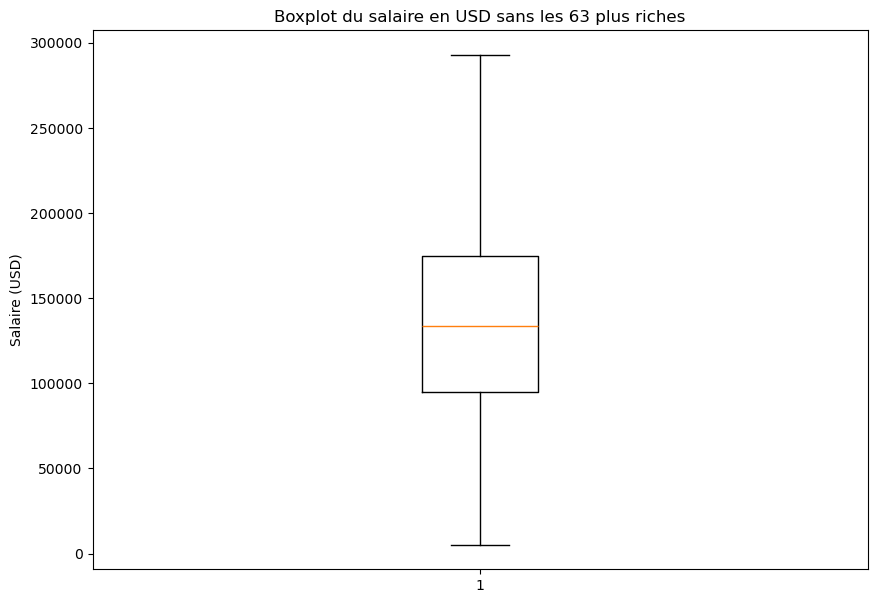

1er quartile :  94916.25
3e quartile : 174500.0
2e quartile : 133916.0
4e quartile : 293000.0


C:\Users\famezziane\AppData\Local\Temp\ipykernel_5392\3194861910.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_experience_level, labels=['SENIOR', 'EXEXUTIVE(Cadres)', 'MID-LEVEL(Intermediaire)', 'ENTRY(Débutant)'])


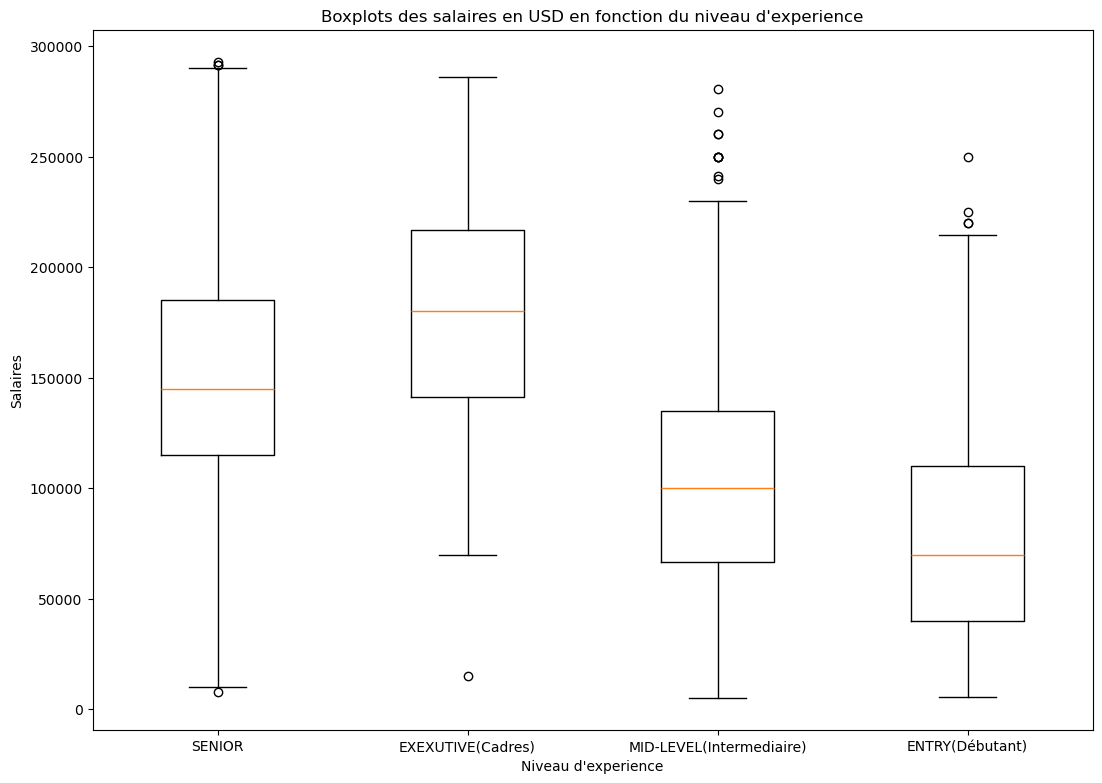

Quartiles pour l'expérience_level SE :
Q1 : 115000.0
Q2 : 145000.0
Q3 : 185000.0
Q4 : 293000.0

Quartiles pour l'expérience_level EX :
Q1 : 141384.5
Q2 : 180000.0
Q3 : 217000.0
Q4 : 286000.0

Quartiles pour l'expérience_level MI :
Q1 : 66760.5
Q2 : 100000.0
Q3 : 135000.0
Q4 : 280700.0

Quartiles pour l'expérience_level EN :
Q1 : 40000.0
Q2 : 70000.0
Q3 : 110000.0
Q4 : 250000.0



In [ ]:
nouveau_tableau = datascience2_sans_top63
print('NOUVEAU TABLEAU SANS 63 VALEURS ABERRANTES' , nouveau_tableau.head())
 # 3692 rows : le tableau est bien celui sans les 63 val ab

# Création d'un nouveau boxplot pour la colonne "salary_in_usd"
plt.figure(figsize=(10, 7))
plt.boxplot(nouveau_tableau['salary_in_usd'])
plt.title('Boxplot du salaire en USD sans les 63 plus riches')
plt.ylabel('Salaire (USD)')
plt.show()
# Plus aucune valeur aberrante dans le boxplot !

# Calcul Q1, Q2, Q3, Q4
Q1 = nouveau_tableau['salary_in_usd'].quantile(0.25)
Q3 = nouveau_tableau['salary_in_usd'].quantile(0.75)
Q2 = nouveau_tableau['salary_in_usd'].quantile(0.5)
Q4 = nouveau_tableau['salary_in_usd'].quantile(1.0)
print('1er quartile : ',Q1)   #1er quartile :  94916.25
print('3e quartile :', Q3)    #3e quartile : 174500.0
print('2e quartile :', Q2)    #2e quartile : 133916.0  --> le salaire median est donc de 133916 dollars par an
print('4e quartile :', Q4)    #4e quartile : 293000.0

# Sélectionner les données pour chaque expérience_level
SE_data = nouveau_tableau[nouveau_tableau['experience_level'] == 'SE']['salary_in_usd']
EX_data = nouveau_tableau[nouveau_tableau['experience_level'] == 'EX']['salary_in_usd']
MI_data = nouveau_tableau[nouveau_tableau['experience_level'] == 'MI']['salary_in_usd']
EN_data = nouveau_tableau[nouveau_tableau['experience_level'] == 'EN']['salary_in_usd']

data_experience_level = [SE_data, EX_data, MI_data, EN_data]

# liste de données pour les boxplots
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_experience_level, labels=['SENIOR', 'EXEXUTIVE(Cadres)', 'MID-LEVEL(Intermediaire)', 'ENTRY(Débutant)'])
plt.title('Boxplots des salaires en USD en fonction du niveau d\'experience')
plt.xlabel('Niveau d\'experience')
plt.ylabel('Salaires')
plt.show()

# Initialiser une liste pour stocker les quartiles de chaque expérience_level
quartiles = []

# Pour chaque experience_level, calculer les quartiles
for data in data_experience_level:
    Q1 = data.quantile(0.25)
    Q2 = data.quantile(0.5)
    Q3 = data.quantile(0.75)
    Q4 = data.quantile(1.0)
    quartiles.append((Q1, Q2, Q3, Q4))

# Afficher les quartiles pour chaque expérience_level
for i, (Q1, Q2, Q3, Q4) in enumerate(quartiles):
    print(f"Quartiles pour l'expérience_level {['SE', 'EX', 'MI', 'EN'][i]} :")
    print(f"Q1 : {Q1}")
    print(f"Q2 : {Q2}")
    print(f"Q3 : {Q3}")
    print(f"Q4 : {Q4}")
    print()


*    EN=Entry(Débutant) MI=Mid(Intermediaire)  SE=Senior EX=Executive(Cadre sup ou de Direction).
*    La boite des 'EX' est la plus haute et plus haute que les 'SE'.
*    La boite des 'EN' est la plus basse.
*    Q3_EX : 217000.0 > Q3_SE : 185000.0 > Q3_MI : 135000.0 > Q3_EN : 110000.0.


---
INTERPERATION :     
*    Les salaires sont plus hauts lorsqu'on est cadre supérieur ou de direction.
*    Les salaires sont plus hauts aussi pour ceux qui ont plus d'expérience(longévité).
*  Les seniors gagnent plus que les débutants en moyenne.  


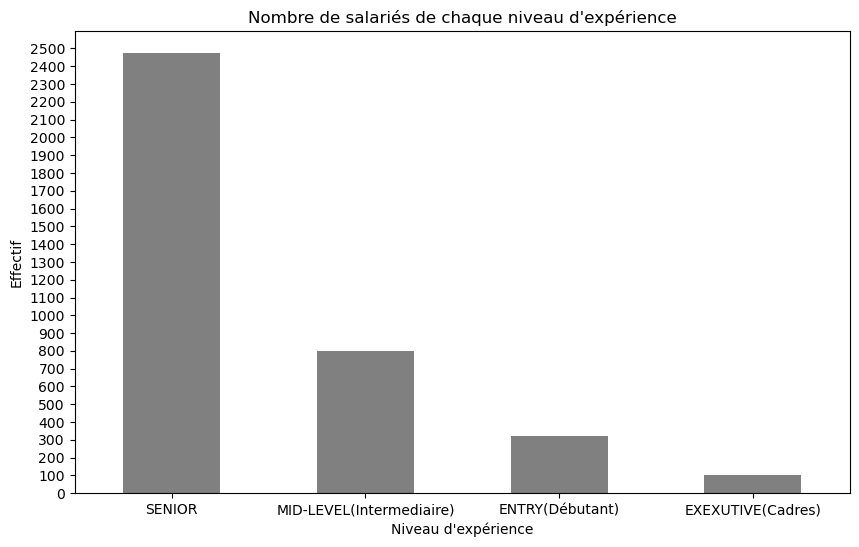

In [ ]:
#On aimerait connaitre le nombre de salariés dans chaque niveau d'experience et le représenter sous forme d'histogramme
occurrences_par_experience = nouveau_tableau['experience_level'].value_counts()
plt.figure(figsize=(10, 6))
occurrences_par_experience.plot(kind='bar', color='grey')
plt.title('Nombre de salariés de chaque niveau d\'expérience')
plt.xlabel('Niveau d\'expérience')
plt.ylabel('Effectif')
plt.yticks(np.arange(0, max(occurrences_par_experience)+100, 100)) #ajuster les graduations des y pour la précision
xticks_labels = ['SENIOR','MID-LEVEL(Intermediaire)', 'ENTRY(Débutant)', 'EXEXUTIVE(Cadres)' ]
plt.xticks(range(0, 4), xticks_labels, rotation=0)
plt.show()



*   Seulement 100 salariés cadres, peu mais ce sont eux les plus riches.
*   On sait aussi que les cadres ont un role essentiel dans chaque entreprise.
*   Neanmoins on a vu dans les boxplots que les salariés à partir du Q3 sont tous >100k $ et moustaches hautes >200k$.



In [ ]:
# Création de 4 sous-tableaux pour faciliter l'étude et le subplot
tableauEX = nouveau_tableau[nouveau_tableau['experience_level'] == 'EX']
tableauSE = nouveau_tableau[nouveau_tableau['experience_level'] == 'SE']
tableauEN = nouveau_tableau[nouveau_tableau['experience_level'] == 'EN']
tableauMI = nouveau_tableau[nouveau_tableau['experience_level'] == 'MI']



*   On souhaite créer un subplot présentant une répartition des salaires pour chaque niveau d'experience.
*   Or on veut s'axer sur le salaire moyen du "nouveau tableau" et diviser la repartition en 4 parties avec cette donnée.

salaire min : 5132
salaire max : 293000
salaire moyen: 134262.9937703142
Partie basse : 67131.4968851571
Partie haute : 201394.4906554713


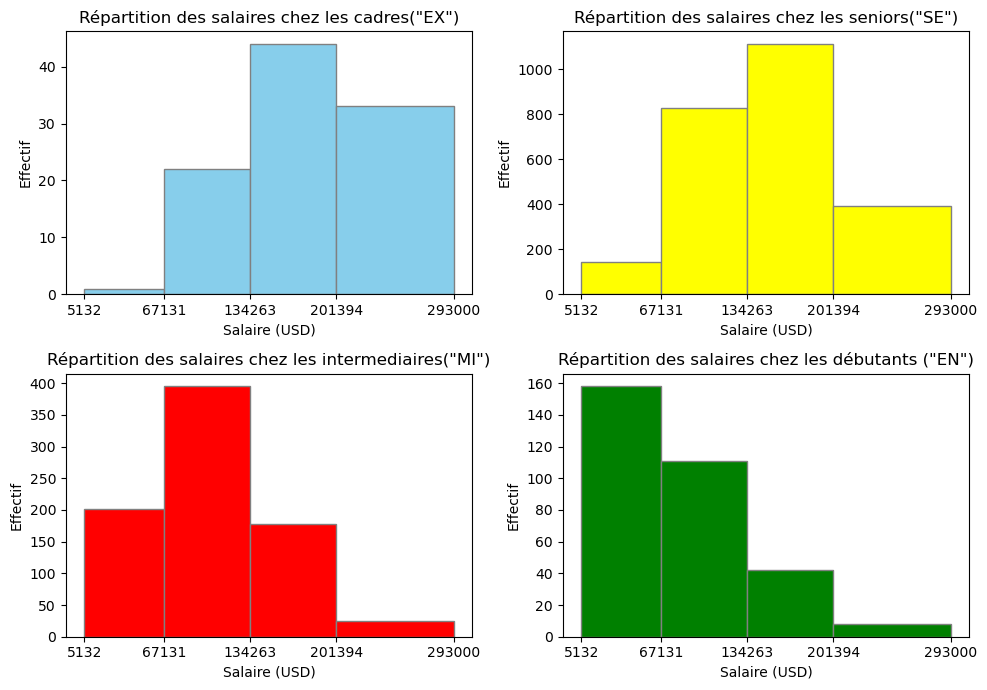

In [ ]:
salaire_min = nouveau_tableau['salary_in_usd'].min()
salaire_max = nouveau_tableau['salary_in_usd'].max()
salaire_moyen = nouveau_tableau['salary_in_usd'].mean()
partie_basse = 0.5*(salaire_moyen)
partie_haute = 1.5*(salaire_moyen)
print('salaire min :', salaire_min)
print('salaire max :', salaire_max)
print('salaire moyen:', salaire_moyen)
print('Partie basse :', partie_basse)
print('Partie haute :', partie_haute)

# Création du subplot avec 4 histogrammes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
bin_edges = [5132, 67131.49, 134262.99, 201394.49, 293000]
# correspondent aux vals des 5 calculs précédents

# Plot histogramme pour experience level 'EX'
ax = axes[0, 0]
ax.hist(tableauEX['salary_in_usd'], bins=bin_edges, color='skyblue', edgecolor='grey')
ax.set_title('Répartition des salaires chez les cadres("EX")')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

# Plot histogramme pour experience level 'SE'
ax = axes[0, 1]
ax.hist(tableauSE['salary_in_usd'], bins=bin_edges, color='yellow', edgecolor='grey')
ax.set_title('Répartition des salaires chez les seniors("SE")')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

# Plot histogramme pour experience level 'MI'
ax = axes[1, 0]
ax.hist(tableauMI['salary_in_usd'], bins=bin_edges, color='red', edgecolor='grey')
ax.set_title('Répartition des salaires chez les intermediaires("MI")')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

# Plot histogramme pour experience level 'EN'
ax = axes[1, 1]
ax.hist(tableauEN['salary_in_usd'], bins=bin_edges, color='green', edgecolor='grey')
ax.set_title('Répartition des salaires chez les débutants ("EN")')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])
plt.tight_layout()
plt.show()


INTERPRETATION :     
*   Subplot salaire selon l'expérience :
Les 4 histogrammes montrent la répartition des salaires selon l'expérience des salariés en data science : sur 300 débutants 160 gagnent moins que 67131 USD, alors que chez les intermédiaires la moitié des cas étudiés gagnent entre la partie basse et le salaire moyen.
Les salaires des seniors varient entre la partie basse et la partie haute tandis que les cadres gagnent jusqu’à 293000 USD par an.



---
*   On veut à présent faire des subplots en fonction des 4 années.
*   Cela pour voir si au fil des années la proportion de "bons salaires" augmentent ou non.

---
INTERPRETATION :    
*    augmentation --> jobs attractifs.


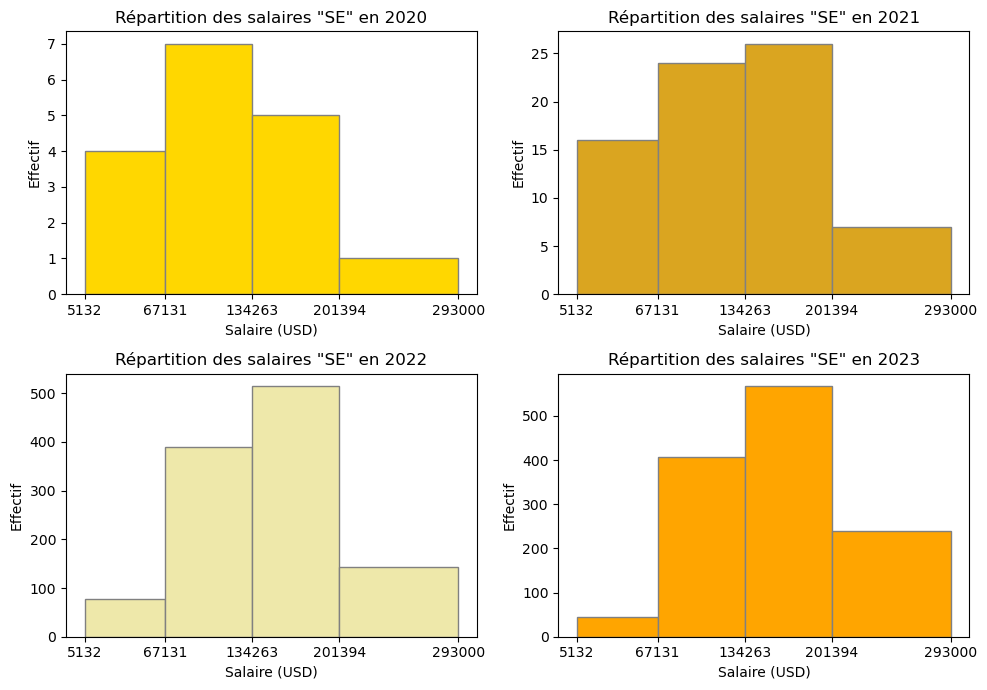

In [ ]:
# Nouveau subplot, repartition des SE en fonction des années
SE2020 = tableauSE[tableauSE['work_year'] == '2020-01-01T00:00:00.000000000']
SE2021 = tableauSE[tableauSE['work_year'] == '2021-01-01T00:00:00.000000000']
SE2022 = tableauSE[tableauSE['work_year'] == '2022-01-01T00:00:00.000000000']
SE2023 = tableauSE[tableauSE['work_year'] == '2023-01-01T00:00:00.000000000']

# Création du subplot avec 4 histogrammes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
bin_edges = [5132, 67131.49, 134262.99, 201394.49, 293000]

# Plot histogramme pour experience level 'SE' en fonction des années
ax = axes[0, 0]
ax.hist(SE2020['salary_in_usd'], bins=bin_edges, color='Gold', edgecolor='grey')
ax.set_title('Répartition des salaires "SE" en 2020')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[0, 1]
ax.hist(SE2021['salary_in_usd'], bins=bin_edges, color='Goldenrod', edgecolor='grey')
ax.set_title('Répartition des salaires "SE" en 2021')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[1, 0]
ax.hist(SE2022['salary_in_usd'], bins=bin_edges, color='PaleGoldenrod', edgecolor='grey')
ax.set_title('Répartition des salaires "SE" en 2022')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[1, 1]
ax.hist(SE2023['salary_in_usd'], bins=bin_edges, color='Orange', edgecolor='grey')
ax.set_title('Répartition des salaires "SE" en 2023')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

plt.tight_layout()
plt.show()


INTERPRETATION :    
*   REPARTITION DES SALAIRES EN 2020 : la majorité des seniors gagne entre 67131 USD et 201394 USD. Cependant, on note la présence d'une petite proportion de salaires plus élevés, allant jusqu'à 293,000 USD.
Cela pourrait indiquer la présence des seniors avec des compétences très spécialisées ou une expérience considérable qui leur permet d'atteindre des niveaux de rémunération plus élevés.
*   REPARTITION DES SALAIRES EN 2021 : la répartition des salaires suit à peu près une tendance similaire à celle de 2020. Cependant, il y a une légère augmentation du nombre de salaires plus élevés.
*   REPARTITION DES SALAIRES EN 2022 : bien que la distribution des salaires reste similaire à celle des années précédentes, il y a une augmentation significative du nombre de salaires plus élevés.
Cela pourrait être le résultat d'une croissance continue de l'industrie de la data science, avec une demande forte des experts hautement qualifiés dans les entreprises.
*   REPARTITION DES SALAIRES EN 2023 : la distribution des salaires suit une tendance similaire à celle de 2022, avec une concentration continue entre le salaire moyen 134262 USD et la partie haute 201394 USD, de plus, une augmentation du nombre de salaires plus élevés.

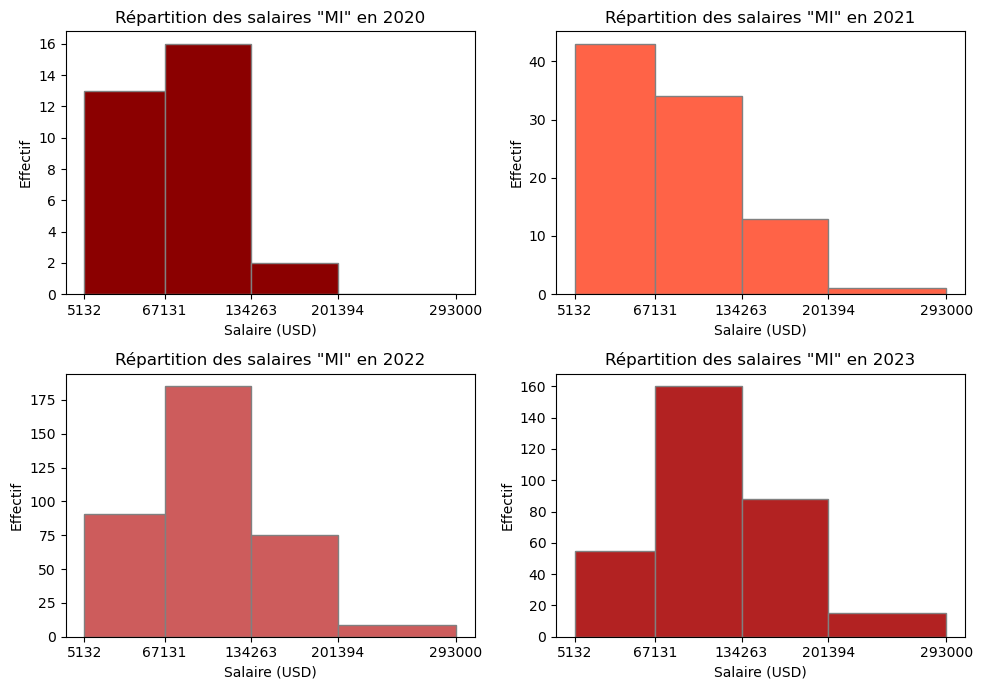

In [ ]:
# Nouveau subplot, repartition que des MI en fonction des années
MI2020 = tableauMI[tableauMI['work_year'] == '2020-01-01T00:00:00.000000000']
MI2021 = tableauMI[tableauMI['work_year'] == '2021-01-01T00:00:00.000000000']
MI2022 = tableauMI[tableauMI['work_year'] == '2022-01-01T00:00:00.000000000']
MI2023 = tableauMI[tableauMI['work_year'] == '2023-01-01T00:00:00.000000000']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
bin_edges = [5132, 67131.49, 134262.99, 201394.49, 293000]

ax = axes[0, 0]
ax.hist(MI2020['salary_in_usd'], bins=bin_edges, color='Darkred', edgecolor='grey')
ax.set_title('Répartition des salaires "MI" en 2020')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[0, 1]
ax.hist(MI2021['salary_in_usd'], bins=bin_edges, color='tomato', edgecolor='grey')
ax.set_title('Répartition des salaires "MI" en 2021')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[1, 0]
ax.hist(MI2022['salary_in_usd'], bins=bin_edges, color='indianred', edgecolor='grey')
ax.set_title('Répartition des salaires "MI" en 2022')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[1, 1]
ax.hist(MI2023['salary_in_usd'], bins=bin_edges, color='firebrick', edgecolor='grey')
ax.set_title('Répartition des salaires "MI" en 2023')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

plt.tight_layout()
plt.show()

INTERPRETATION :    
*     REPARTITION DES SALAIRES EN 2020 : la distribution des salaires pour les intermédiaires MI varie entre le salaire minimum et le salaire moyen.
*     REPARTITION DES SALAIRES EN 2021 : Une augmentation exponentielle est visible de l’effectif et des salaires par rapport à 2021.
Quelques-uns dépassent la barre symbolique de 201394, tandis qu’en moins une quinzaine gagnent entre 134262 USD et 201394 USD.
*     REPARTITION DES SALAIRES EN 2022-2023 : Les raisons socio-économiques évoquées plus haut expliquent l’augmentation continue de l’effectif et des rémunérations.
Les salaires varient essentiellement entre la partie basse et la partie haute.

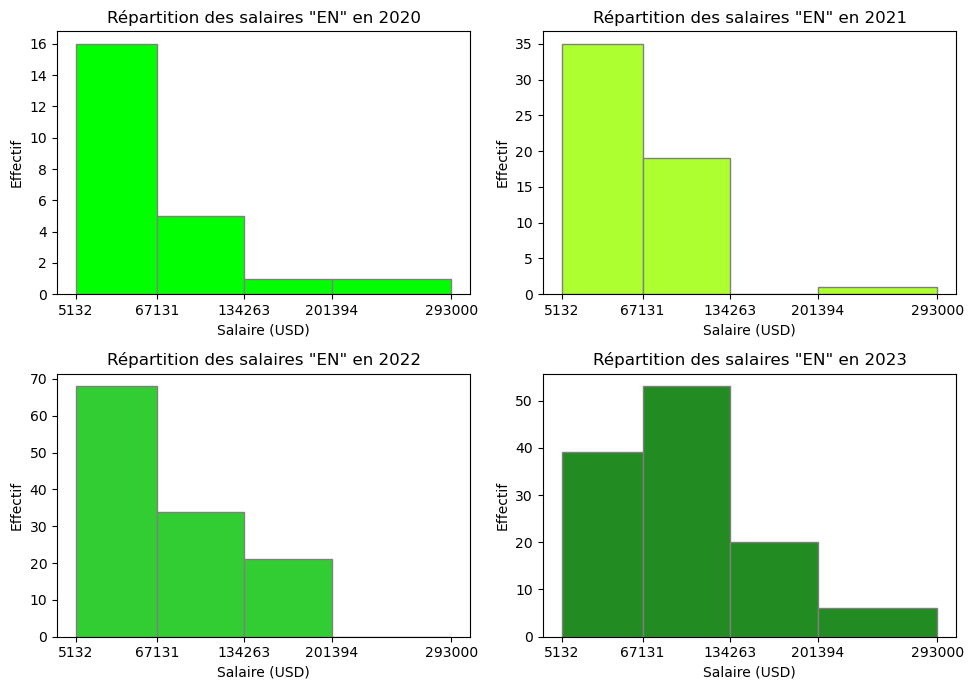

In [ ]:
# Nouveau subplot, répartition uniquement pour 'EN' en fonction des années
EN2020 = tableauEN[tableauEN['work_year'] == '2020-01-01T00:00:00.000000000']
EN2021 = tableauEN[tableauEN['work_year'] == '2021-01-01T00:00:00.000000000']
EN2022 = tableauEN[tableauEN['work_year'] == '2022-01-01T00:00:00.000000000']
EN2023 = tableauEN[tableauEN['work_year'] == '2023-01-01T00:00:00.000000000']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
bin_edges = [5132, 67131.49, 134262.99, 201394.49, 293000]

ax = axes[0, 0]
ax.hist(EN2020['salary_in_usd'], bins=bin_edges, color='lime', edgecolor='grey')
ax.set_title('Répartition des salaires "EN" en 2020')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[0, 1]
ax.hist(EN2021['salary_in_usd'], bins=bin_edges, color='greenyellow', edgecolor='grey')
ax.set_title('Répartition des salaires "EN" en 2021')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[1, 0]
ax.hist(EN2022['salary_in_usd'], bins=bin_edges, color='limegreen', edgecolor='grey')
ax.set_title('Répartition des salaires "EN" en 2022')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

ax = axes[1, 1]
ax.hist(EN2023['salary_in_usd'], bins=bin_edges, color='forestgreen', edgecolor='grey')
ax.set_title('Répartition des salaires "EN" en 2023')
ax.set_xlabel('Salaire (USD)')
ax.set_ylabel('Effectif')
ax.set_xticks([5132, 67131.49, 134262.99, 201394.49, 293000])

plt.tight_layout()
plt.show()

INTERPRETATION :    
*    REPARTITION DES SALAIRES EN 2020-2021 : la plupart des débutants en ces deux années  gagnent entre le salaire minimum et la partie basse 67131 USD. Alors que l’effectif a remarquablement augmenté.
*    REPARTIOTN DES SALAIRES EN 2022-2023 : en 2022, le nombre d’ingénieurs double, leur salaires varient entre 5135 USD et 201394 USD. En 2023, une catégorie gagnant plus de la partie haute commence à se développer.
Cela veut dire que la demande dans le domaine de la data science augmente, les débutants sont de plus en plus qualifiés pour occuper des postes exigeants dans les entreprises.


---





A present, on fait une étude plus profonde sur les cadres ('EX').

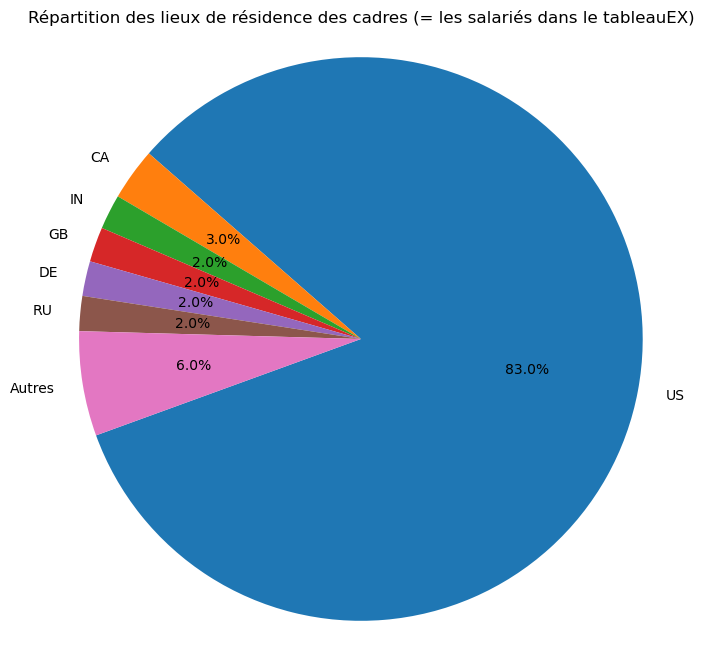

In [ ]:
tableauEX = nouveau_tableau[nouveau_tableau['experience_level'] == 'EX']

# Leur lieu d'habitation avec la colonne employee_residence : PIE CHART
# Compter le nombre d'occurrences de chaque lieu de résidence
occurrences_par_habitation = tableauEX['employee_residence'].value_counts()
# Regroupement des lieux de résidence avec une seule occurrence sous la catégorie "Autres"
occurrences_par_habitation['Autres'] = occurrences_par_habitation[occurrences_par_habitation == 1].sum()
occurrences_par_habitation = occurrences_par_habitation[occurrences_par_habitation > 1]
plt.figure(figsize=(8, 8))
plt.pie(occurrences_par_habitation, labels=occurrences_par_habitation.index, autopct='%1.1f%%', startangle=200)
plt.title('Répartition des lieux de résidence des cadres (= les salariés dans le tableauEX)')
plt.axis('equal')
plt.show()

INTERPRETATION :  
*    REPARTITION DES LIEUX DE RESIDENCES DES CADRES : Le pie chart montre que 83.0% des cadres travaillant aux USA, les 11% travaillent se répartissent entre USA, GB, CA, RU et IN. seuls 5% dans le reste du monde.
Ceci indique que le marché du travail IT est beaucoup plus aux USA que le reste du monde.


---



On souhaite savoir la taille des entreprises où les cadres US travaillent et les comparer avec les seniors, mids et débutants.

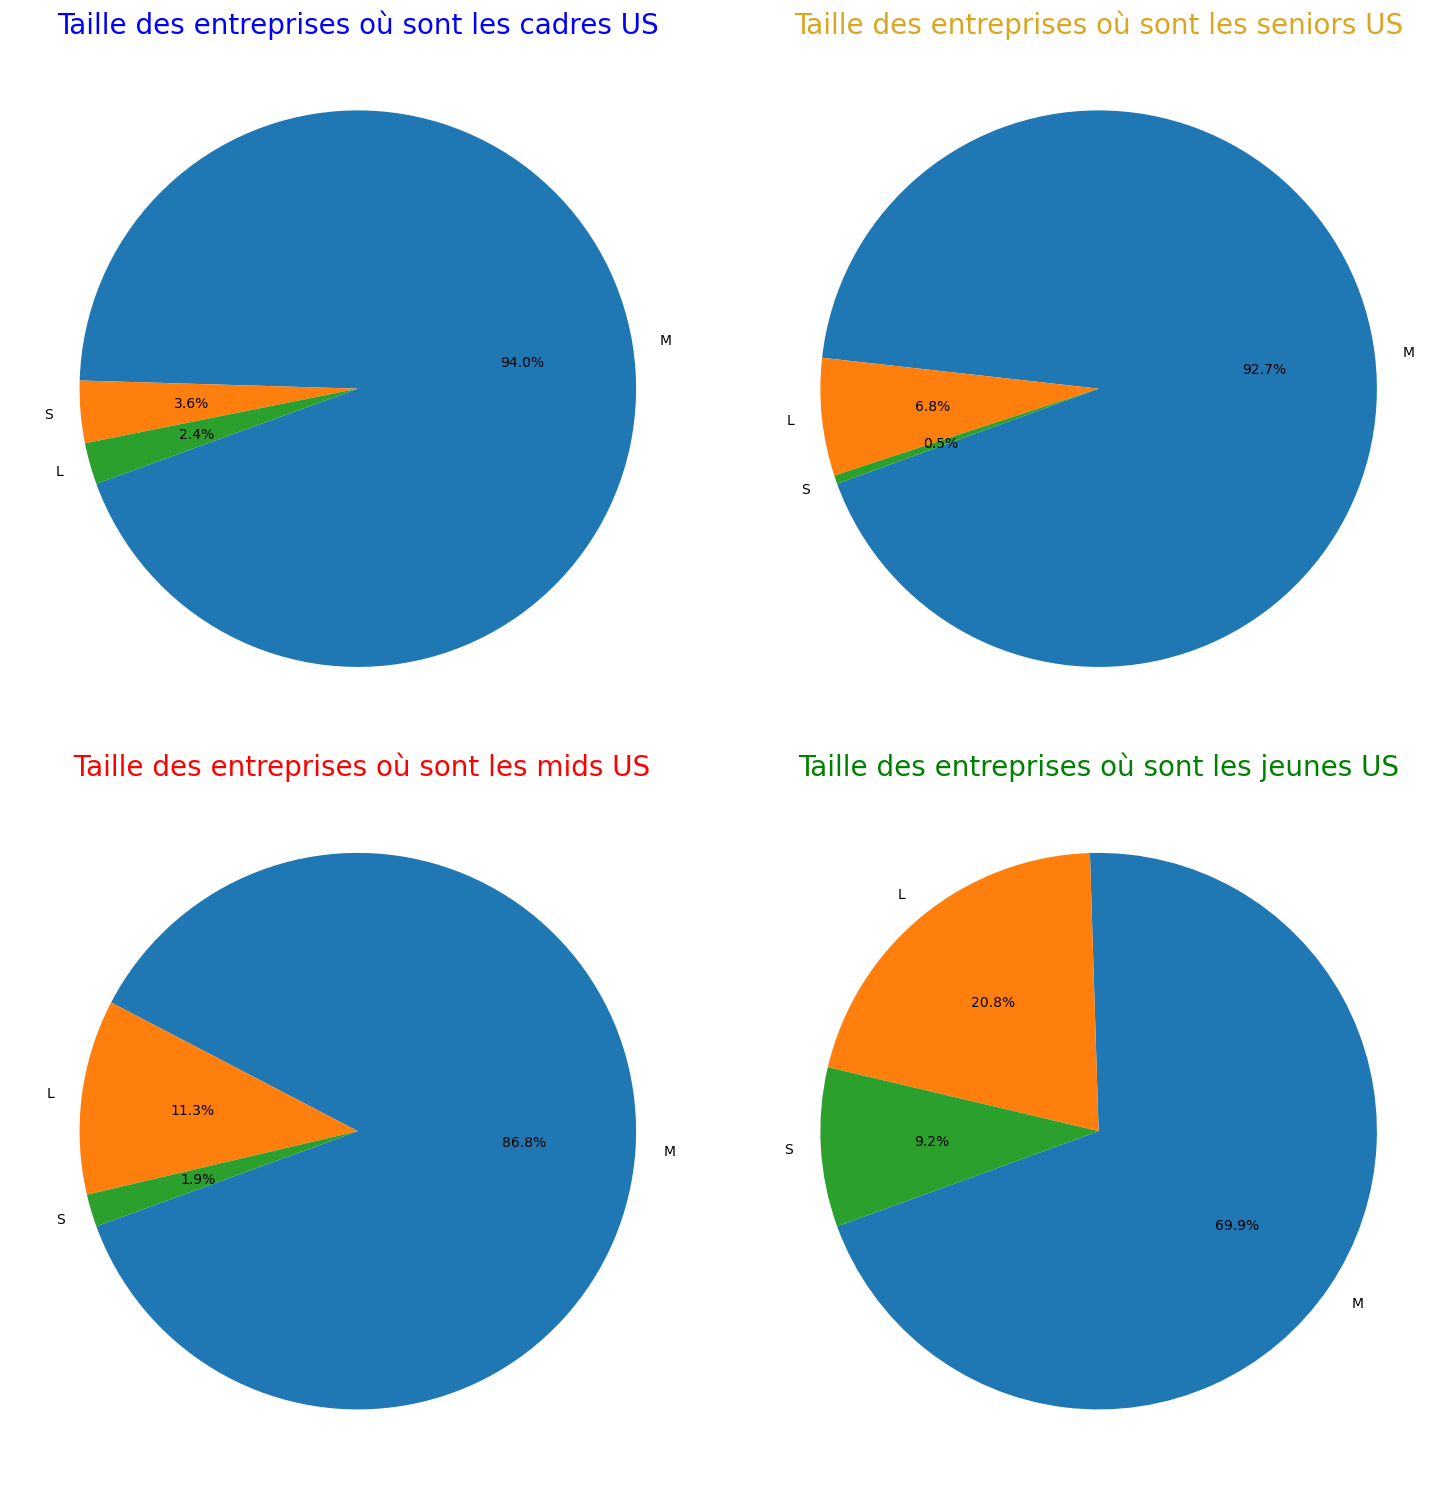

In [ ]:
#SUBPLOT AVEC DES PIE CHART

cadres_USA = tableauEX[tableauEX['employee_residence'] == 'US'] #tableau avec uniquement les cadres des USA
seniors_USA = tableauSE[tableauSE['employee_residence'] == 'US']   #tableau avec uniquement les seniors des USA
mids_USA = tableauMI[tableauMI['employee_residence'] == 'US']   #tableau avec uniquement les intermediaires des USA
jeunes_USA = tableauEN[tableauEN['employee_residence'] == 'US']   #tableau avec uniquement les débnutants des USA

# Données pour les cadres américains
entreprise_cadres = cadres_USA['company_size'].value_counts()
entreprise_cadres['Autres'] = entreprise_cadres[entreprise_cadres == 1].sum()
entreprise_cadres = entreprise_cadres[entreprise_cadres > 1]

# Données pour les seniors américains
entreprise_seniors = seniors_USA['company_size'].value_counts()
entreprise_seniors['Autres'] = entreprise_seniors[entreprise_seniors == 1].sum()
entreprise_seniors = entreprise_seniors[entreprise_seniors > 1]

# Données pour les mids américains
entreprise_mids = mids_USA['company_size'].value_counts()
entreprise_mids['Autres'] = entreprise_mids[entreprise_mids == 1].sum()
entreprise_mids = entreprise_mids[entreprise_mids > 1]

# Données pour les jeunes américains
entreprise_jeunes = jeunes_USA['company_size'].value_counts()
entreprise_jeunes['Autres'] = entreprise_jeunes[entreprise_jeunes == 1].sum()
entreprise_jeunes = entreprise_jeunes[entreprise_jeunes > 1]

# Création du subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Pie Chart pour les cadres américains
axes[0, 0].pie(entreprise_cadres, labels=entreprise_cadres.index, autopct='%1.1f%%', startangle=200)
axes[0, 0].set_title('Taille des entreprises où sont les cadres US', color='blue', fontsize=20)

# Pie Chart pour les seniors américains
axes[0, 1].pie(entreprise_seniors, labels=entreprise_seniors.index, autopct='%1.1f%%', startangle=200)
axes[0, 1].set_title('Taille des entreprises où sont les seniors US', color='Goldenrod', fontsize=20)

# Pie Chart pour les mids américains
axes[1, 0].pie(entreprise_mids, labels=entreprise_mids.index, autopct='%1.1f%%', startangle=200)
axes[1, 0].set_title(' Taille des entreprises où sont les mids US', color='red', fontsize=20)

# Pie Chart pour les jeunes américains
axes[1, 1].pie(entreprise_jeunes, labels=entreprise_jeunes.index, autopct='%1.1f%%', startangle=200)
axes[1, 1].set_title('Taille des entreprises où sont les jeunes US', color='green', fontsize=20)

plt.tight_layout()
plt.show()

INTERPRETATION :    
*  LA TAILLE DES ENTREPRISES AUX USA ET LA REPARTITION DES SALARIES :
1. Pie chart des EN américains : 94.0% des cadres travaillent dans les entreprises de taille moyenne.
2. Pie chart des SE américains : 92.7% des seniors travaillent dans des entreprises de taille moyenne.
3. Pie chart des intermédiaires américains : 86.8% des intermédiaires travaillent dans des entreprises de taille moyenne.
4. Pie chart des débutants américains : bien que la même tendance de répartition soit observable dans le cas des débutants,dans les entreprises larges le pourcentage atteint les 20.8%.
L’activité des entreprises moyennes fait appel au travail des ingénieurs en data science beaucoup plus que les entreprises de taille large et petite. Cependant, les débutants sont embauchés activement dans toute sorte d’entreprise.   

---



Corrélation entre la taille de l'entreprise et la proportion de télétravail des salariés :

In [ ]:
# Création d'un LabelEncoder
label_encoder2 = LabelEncoder()
# Encodage des valeurs de "company_size" en valeurs numériques
cadres_USA.loc[:, 'company_size_encoded'] = label_encoder2.fit_transform(cadres_USA['company_size'])
# Calcul de la corrélation entre "remote_ratio" et "company_size_encoded"
correlation = cadres_USA['remote_ratio'].corr(cadres_USA['company_size_encoded'])
print("Corrélation entre remote_ratio et company_size_encoded:", correlation)
#0.1521289066099762

Corrélation entre remote_ratio et company_size_encoded: 0.15212890660997627


C:\Users\famezziane\AppData\Local\Temp\ipykernel_5392\586883418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadres_USA.loc[:, 'company_size_encoded'] = label_encoder2.fit_transform(cadres_USA['company_size'])


## PARTIE 2.B : PROJECTION DES DONNÉES ET VISUALISATION

### 1. MATRICE DE CORRÉLATION & HEATMAP :

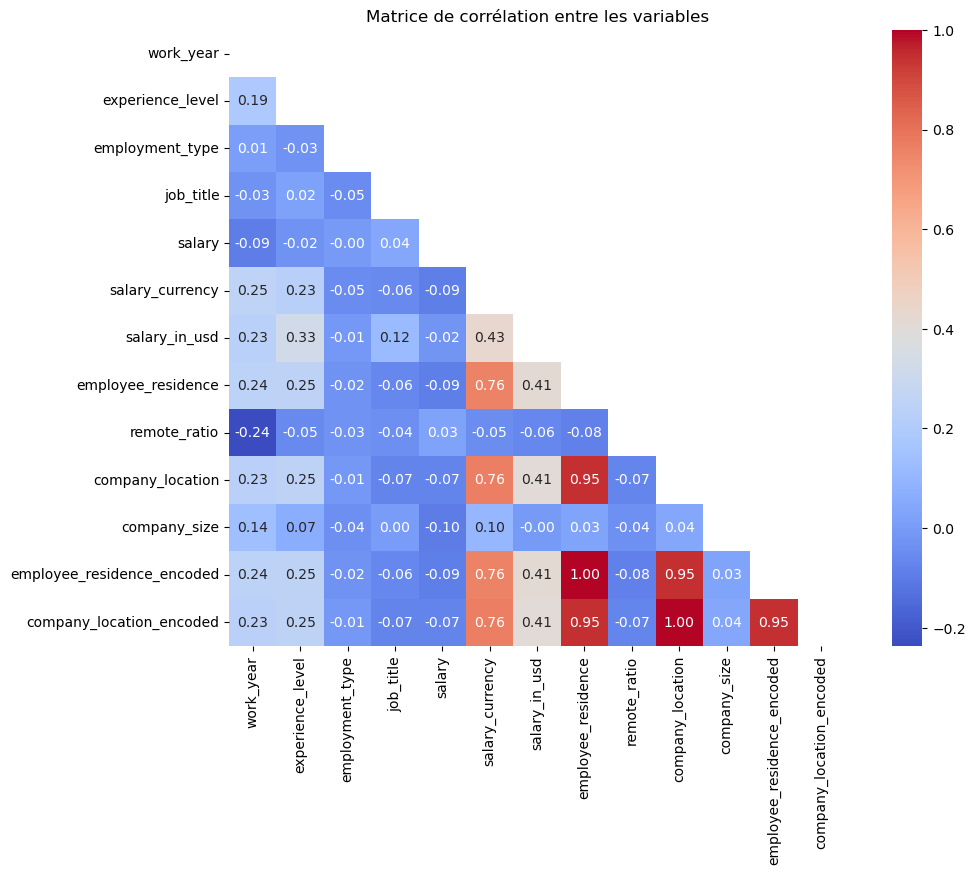

<Axes: >

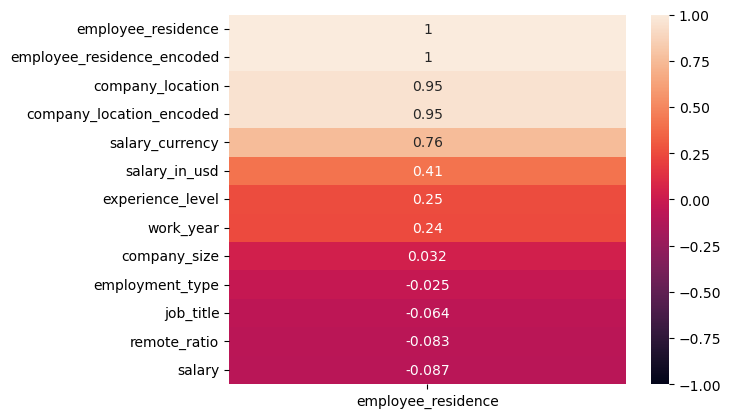

In [ ]:
datascience2['work_year'] = datascience2['work_year'].astype(np.int64)
label_encoder3 = LabelEncoder()
datascience2_encoded = datascience2.copy()  # Créer une copie du DataFrame pour ne pas modifier l'original
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                    'employee_residence', 'company_location', 'company_size']
for col in categorical_cols:
    datascience2_encoded[col] = label_encoder3.fit_transform(datascience2[col])

matrice_corrélation = datascience2_encoded.corr()
mask = np.triu(np.ones_like(matrice_corrélation, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(matrice_corrélation, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matrice de corrélation entre les variables')
plt.show()

sns.heatmap(datascience2_encoded.corr()[['employee_residence']].sort_values(by='employee_residence', ascending=False), vmin=-1, vmax=1, annot=True,)

INTERPRETATION : voir SLIDE dans PLOTS.

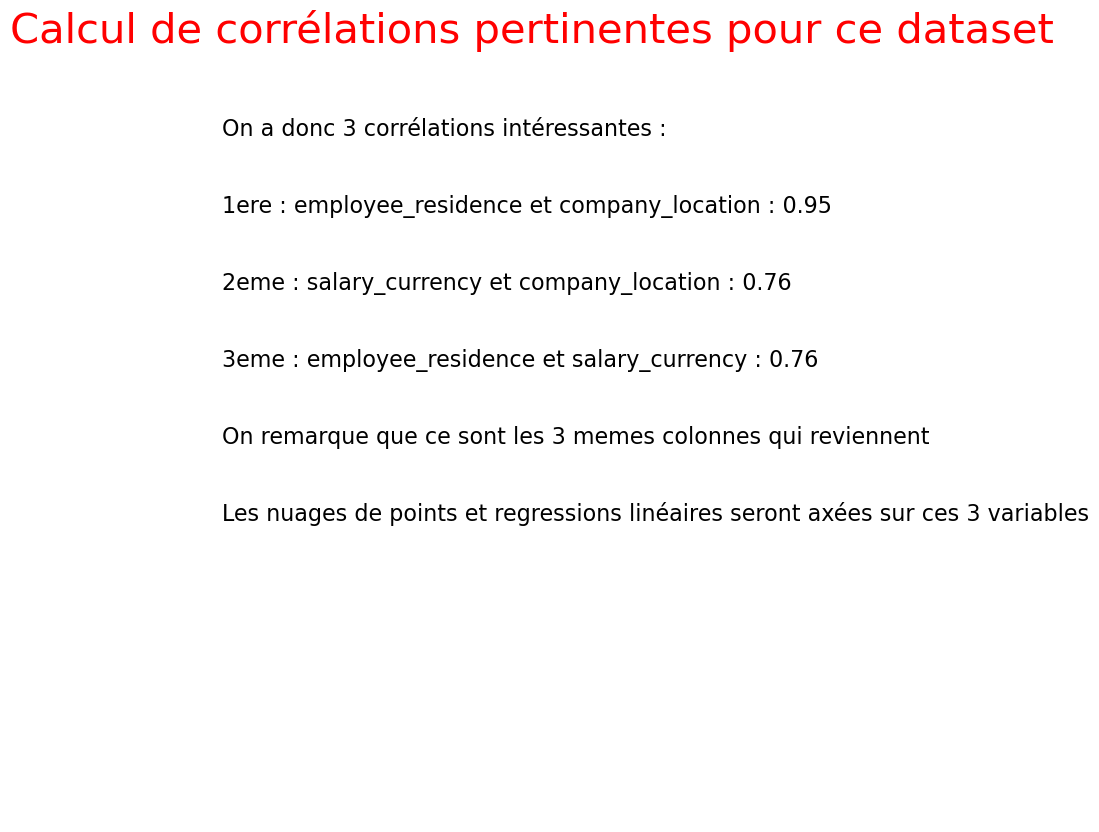

In [ ]:
ig, ax = plt.subplots(figsize=(10, 10))
plt.title('Calcul de corrélations pertinentes pour ce dataset', fontsize=30, color='red')

# Ajout des lignes de texte
text_lines = [
"On a donc 3 corrélations intéressantes :",
"1ere : employee_residence et company_location : 0.95",
"2eme : salary_currency et company_location : 0.76",
"3eme : employee_residence et salary_currency : 0.76",
"On remarque que ce sont les 3 memes colonnes qui reviennent",
"Les nuages de points et regressions linéaires seront axées sur ces 3 variables",
             ]

# Positionnement du texte
for i, line in enumerate(text_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, ha='left', va='center', color='black', fontsize=16)

ax.axis('off')
plt.show()

# Données de corrélations
correlations = {
    "employee_residence - company_location": 0.95,
    "salary_currency - company_location": 0.76,
    "employee_residence - salary_currency": 0.76
}

### 2. VISUALISATION 2D OU 3D :
*    Création des nuages de points :

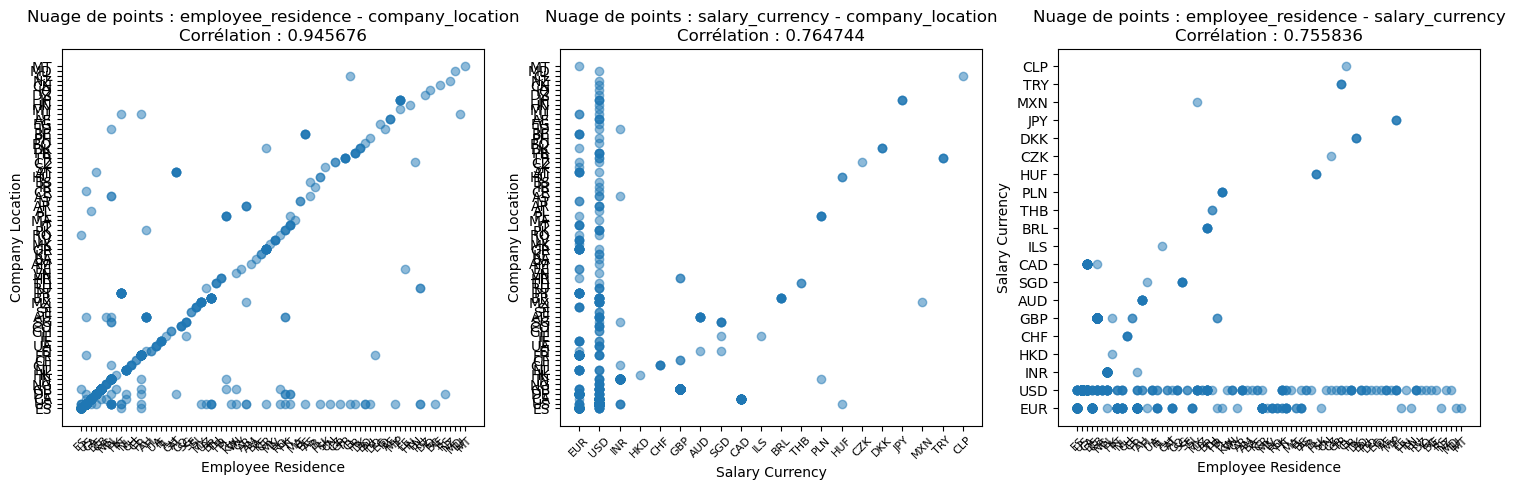

    Explained Variance Ratio  Cumulative Variance Ratio
0               3.837284e-01                   0.383728
1               1.003611e-01                   0.484090
2               8.849799e-02                   0.572588
3               8.163582e-02                   0.654223
4               7.299514e-02                   0.727218
5               7.108399e-02                   0.798302
6               6.778856e-02                   0.866091
7               5.452519e-02                   0.920616
8               4.621959e-02                   0.966836
9               2.490451e-02                   0.991740
10              8.259662e-03                   1.000000
11              5.638714e-17                   1.000000
12              0.000000e+00                   1.000000


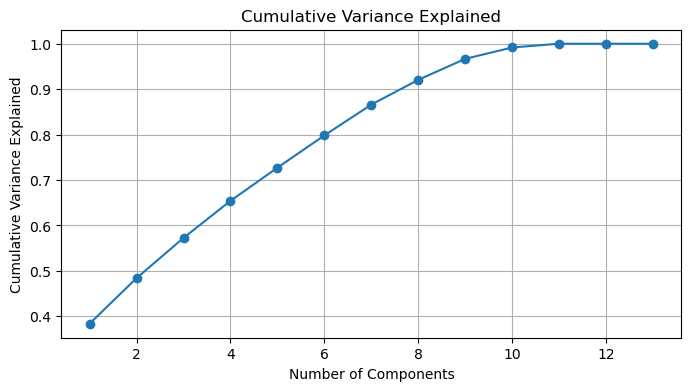

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Nuage de points pour employee_residence - company_location
axes[0].scatter(datascience2['employee_residence'], datascience2['company_location'], alpha=0.5)
axes[0].set_xlabel('Employee Residence')
axes[0].set_ylabel('Company Location')
axes[0].set_title('Nuage de points : employee_residence - company_location\nCorrélation : 0.945676')
axes[0].tick_params(axis='x', labelrotation=45, labelsize=8)

# Nuage de points pour salary_currency - company_location
axes[1].scatter(datascience2['salary_currency'], datascience2['company_location'], alpha=0.5)
axes[1].set_xlabel('Salary Currency')
axes[1].set_ylabel('Company Location')
axes[1].set_title('Nuage de points : salary_currency - company_location\nCorrélation : 0.764744')
axes[1].tick_params(axis='x', labelrotation=45, labelsize=8)

# Nuage de points pour employee_residence - salary_currency
axes[2].scatter(datascience2['employee_residence'], datascience2['salary_currency'], alpha=0.5)
axes[2].set_xlabel('Employee Residence')
axes[2].set_ylabel('Salary Currency')
axes[2].set_title('Nuage de points : employee_residence - salary_currency\nCorrélation : 0.755836')
axes[2].tick_params(axis='x', labelrotation=45, labelsize=8)

plt.tight_layout()
plt.show()

# Réduction de la dimensionalité avec PCA
# Charger les données
df = datascience2_encoded # juste pour ecrire plus rapidement
colonnes = ['work_year', 'experience_level', 'employment_type', 'job_title',
            'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
            'remote_ratio', 'company_location', 'company_size', 'employee_residence_encoded', 'company_location_encoded']

X = df[colonnes]

# Centrage et mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Création d'un objet PCA + Application aux données
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualisation de la variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
variance_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio,
                            'Cumulative Variance Ratio': cumulative_variance_ratio})
print(variance_df)

# Création du graphique pour illustrer
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

INTERPRETATION : 8 dimensions suffisent à capturer plus de 90% des informations.

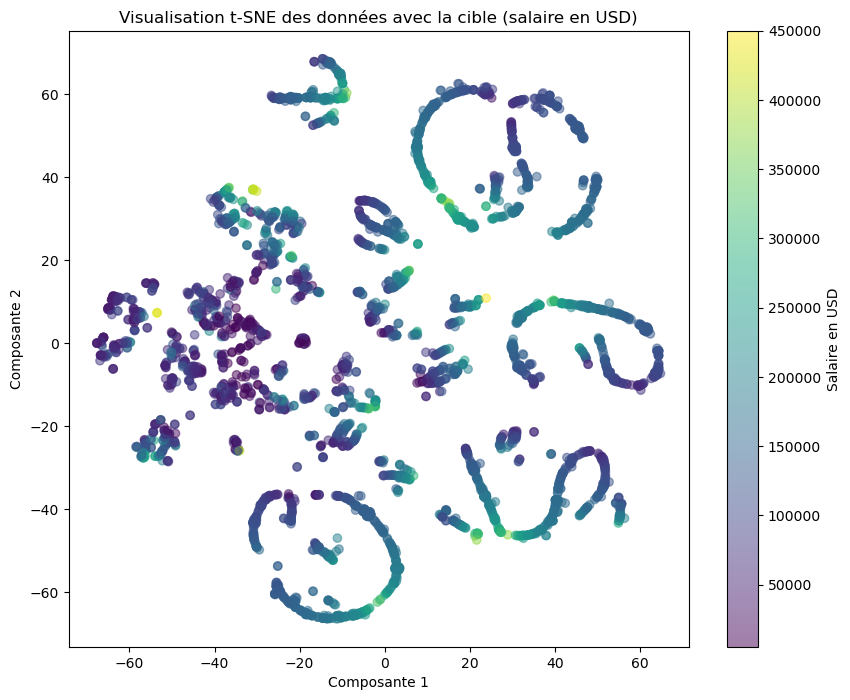

In [ ]:
# Réduction de la dimensionnalité avec t-SNE, surtout pour avoir une représentation graphique
# Extraction des caractéristiques
X = df[colonnes]
Y = df['salary_in_usd']
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.5)
plt.title('Visualisation t-SNE des données avec la cible (salaire en USD)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.colorbar(label='Salaire en USD')
plt.show()

### 3. PROCESSUS DE VALIDATION EXTERNE : RÉGRESSIONS

*   On choisit la regréssion car la seule variable intéressante à prédire et le salaire en $.
*   Sachant que c'est une variable numérique, nous allons déterminer quelle régression est la plus pertinente.


In [ ]:
# Définition des modèles
models = {
    "Linear Regression": (LinearRegression(), {'normalize': [True, False]}),
    "Ridge Regression": (Ridge(), {'max_iter': [10, 20, 30], 'solver': ['auto', 'svd', 'cholesky']}),
    "XGBoost Regressor": (XGBRegressor(), {}),
    "Random Forest Regressor": (RandomForestRegressor(), {'n_estimators': [5, 10, 20,30,50], 'criterion': ['mse', 'mae'], 'max_depth': [None, 5, 10,15,25], 'random_state': 42}),
    "Gradient Boosting Regressor": (GradientBoostingRegressor(), {'max_depth': [5, 10, 20], 'loss': ['ls', 'lad'], 'n_estimators': [5, 10, 20], 'random_state': 42}),
    "SVR": (SVR(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
    "ElasticNet": (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}),
    "Lasso Regression": (Lasso(), {'alpha': [0.1, 1, 10]}),
    "Decision Tree Regressor": (DecisionTreeRegressor(), {'max_depth': [None, 5, 10, 15]})
}

# Sélection du meilleur modèle
best_r2 = -float('inf')
best_model_name = None
best_model = None
for name, (model, params) in models.items():
    pipe = Pipeline([('Model', model)])
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.20)
    model = pipe.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    print(f'{name} - MSE: {mse:.4f}')
    print(f'{name} - R2: {r2:.4f}')
    print(f'{name} - MAE: {mae:.4f}\n')

    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

print('The best model is:', best_model_name)
print('The best model R2 is' , best_r2)

Linear Regression - MSE: 0.0001
Linear Regression - R2: 1.0000
Linear Regression - MAE: 0.0052

Ridge Regression - MSE: 0.0000
Ridge Regression - R2: 1.0000
Ridge Regression - MAE: 0.0000



c:\Users\famezziane\OneDrive - MIDRANGE COMPUTERS\Documents\Projet Python Fatine\.conda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.31777e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


XGBoost Regressor - MSE: 3228742.2500
XGBoost Regressor - R2: 0.9992
XGBoost Regressor - MAE: 445.1849

Random Forest Regressor - MSE: 219177.9078
Random Forest Regressor - R2: 0.9999
Random Forest Regressor - MAE: 106.4749

Gradient Boosting Regressor - MSE: 336870.0339
Gradient Boosting Regressor - R2: 0.9999
Gradient Boosting Regressor - MAE: 331.4481

SVR - MSE: 3948178279.6508
SVR - R2: -0.0001
SVR - MAE: 48559.3613

ElasticNet - MSE: 0.0000
ElasticNet - R2: 1.0000
ElasticNet - MAE: 0.0024

Lasso Regression - MSE: 0.0000
Lasso Regression - R2: 1.0000
Lasso Regression - MAE: 0.0049

Decision Tree Regressor - MSE: 218158.2810
Decision Tree Regressor - R2: 0.9999
Decision Tree Regressor - MAE: 110.1185

The best model is: Ridge Regression
The best model R2 is 1.0


*    Utiliser la régression linéaire comme le meilleur modèle, résultat du programme précédent.

In [ ]:
# Notre variance ciblée : salary_in_usd
best_model = LinearRegression()
best_model.fit(X_train, Y_train)
y_pred = best_model.predict(X_test)

#Calculer les métriques d'évaluation (MSE, R², MAE)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Afficher les résultats
print("Best Model: Linear Regression")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)

Best Model: Linear Regression
MSE: 5.119675913146929e-05
R2: 0.999999999999987
MAE: 0.005158183985922454


INTERPRETATION :
*   MSE : 4.73246108596992e-10 , hyper proche de 0, la regression linéaire pour nos données prédit les valeurs de manière très précise.
*   R2 : 1.0 , le modèle explique parfaitement la variance de la variable cible à l'aide des caractéristiques.
*   MAE : 1.1574754780704049e-05 , proche de 0 , précision élevée de la regréssion lineare.

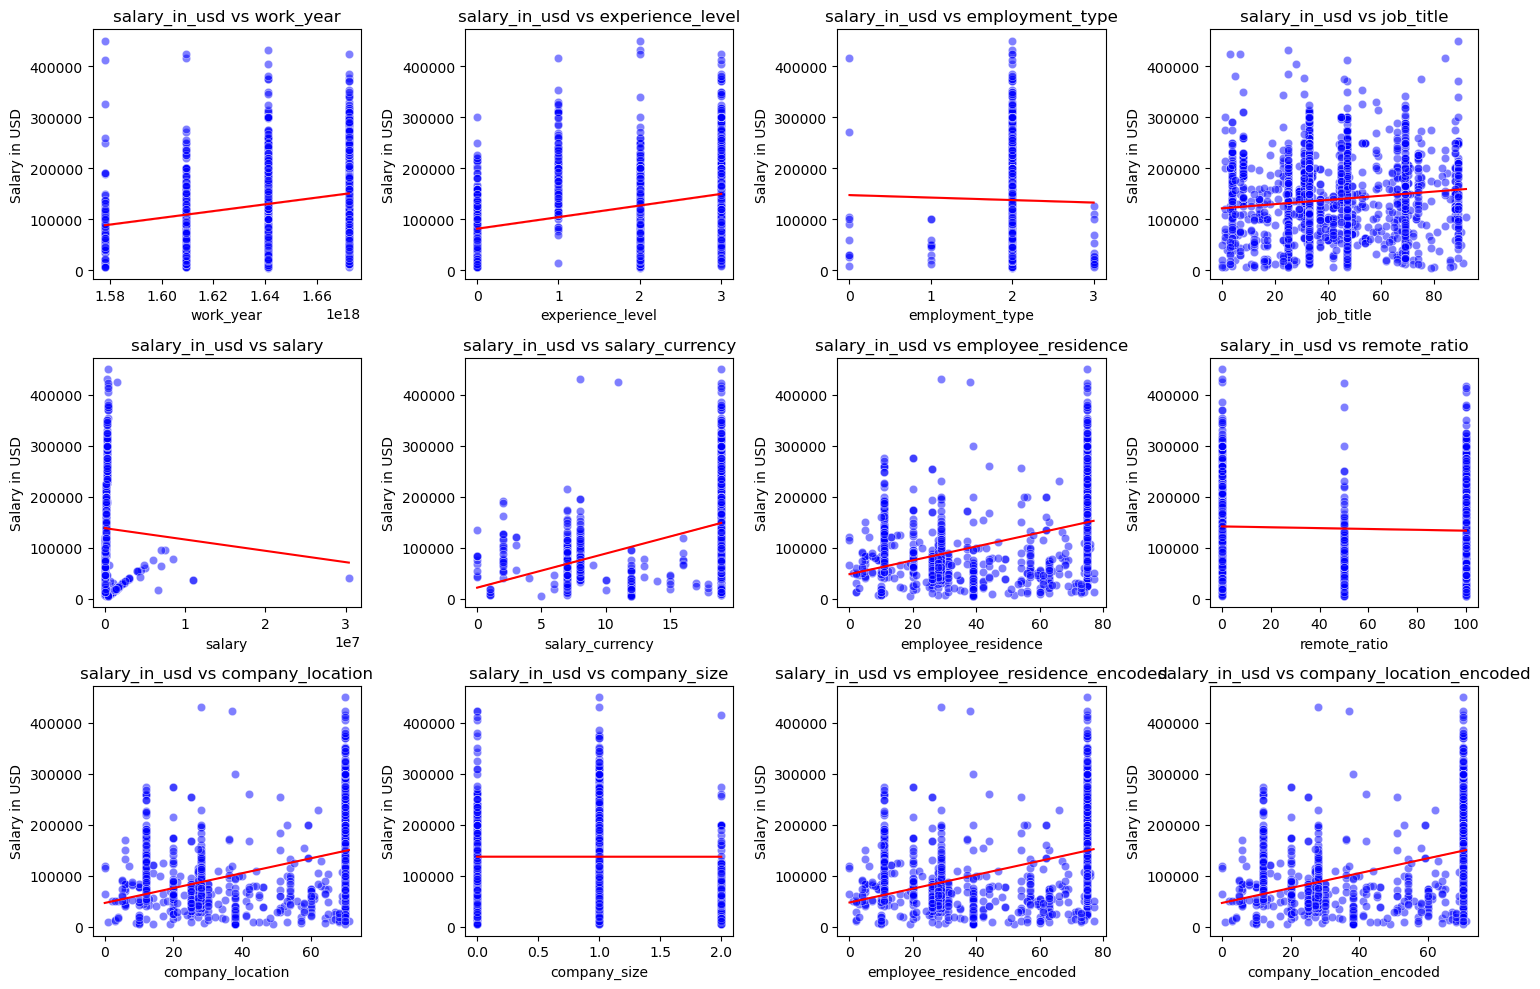

In [ ]:
# Définir les colonnes à utiliser pour la régression linéaire
colonnes = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'employee_residence_encoded', 'company_location_encoded']

# Initialiser une figure
plt.figure(figsize=(15, 10))

# Boucle sur chaque colonne
for i, col in enumerate(colonnes):

    # Créer un sous-ensemble de données avec la colonne actuelle et la variable cible
    X = df[[col]]
    Y = df['salary_in_usd']

    # Ajuster une régression linéaire
    model = LinearRegression()
    model.fit(X, Y)

    # Faire des prédictions
    Y_pred = model.predict(X)

    # Tracer la régression linéaire et les points de données
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=X[col], y=Y, color='blue', alpha=0.5)
    sns.lineplot(x=X[col], y=Y_pred, color='red')
    plt.title(f'salary_in_usd vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary in USD')

plt.tight_layout()
plt.show()

ANALYSE ET INTERPRETATION :
*   Les regréssions sur l'ensemble du tableau ne sont pas forcément pertinentes et bien lisibles.
*   L'utilisation de plusieurs variables explicatives peut améliorer la capacité du modèle à expliquer la variation dans la variable cible (salaire en USD).
*   En prenant en compte plusieurs aspects qui peuvent influencer le salaire, on pourrait faire une regréssion lineare multiple avec des études plus précises.
*   On remarque néanmoins que certaines régressions ont une pente positive.
*   work_year, experience_level, job_title, employee_residence_encoded, company_location_encoded.

## PARTIE 3 : APPRENTISSAGE ARTIFICIEL

*   Nous aimerons faire plusieurs régressiosns plus ciblées :

1. Salaire des cadres aux USA, des datascientist en France+Allemagne+Espagne, salaire des débutants dans le monde.

2. Code pour : débutants = 0 dans colonne 'experience_level', cadres = 1 dans colonne 'experience_level', dans la colonne 'company_location' : France = 27, USA = 70, Espagne = 25, Allemagne = 20, datascientist = 47 dans la colonne 'job_title'.

In [ ]:
#Création des sous-tableaux
cadresUS_regr = df[(df['experience_level'] == 1) & (df['company_location'] == 70)] # ce nom pour distinguer du cadres_USA
datascientist_FR = df[(df['company_location'] == 27) & (df['job_title'] == 47)]
datascientist_ES =  df[(df['company_location'] == 25) & (df['job_title'] == 47)]
datascientist_DE =  df[(df['company_location'] == 20 ) & (df['job_title'] == 47)]
datascientist_FRESDE = pd.concat([datascientist_FR, datascientist_ES, datascientist_DE], ignore_index=True)
debutants_monde = df[df['experience_level'] == 0]

*   REGRESSIONS LINÉAIRES SIMPLES POUR CHACUN DES 3 TABLEAUX + MSE R2 ET MAE DE CHAQUE GRAPHIQUE.

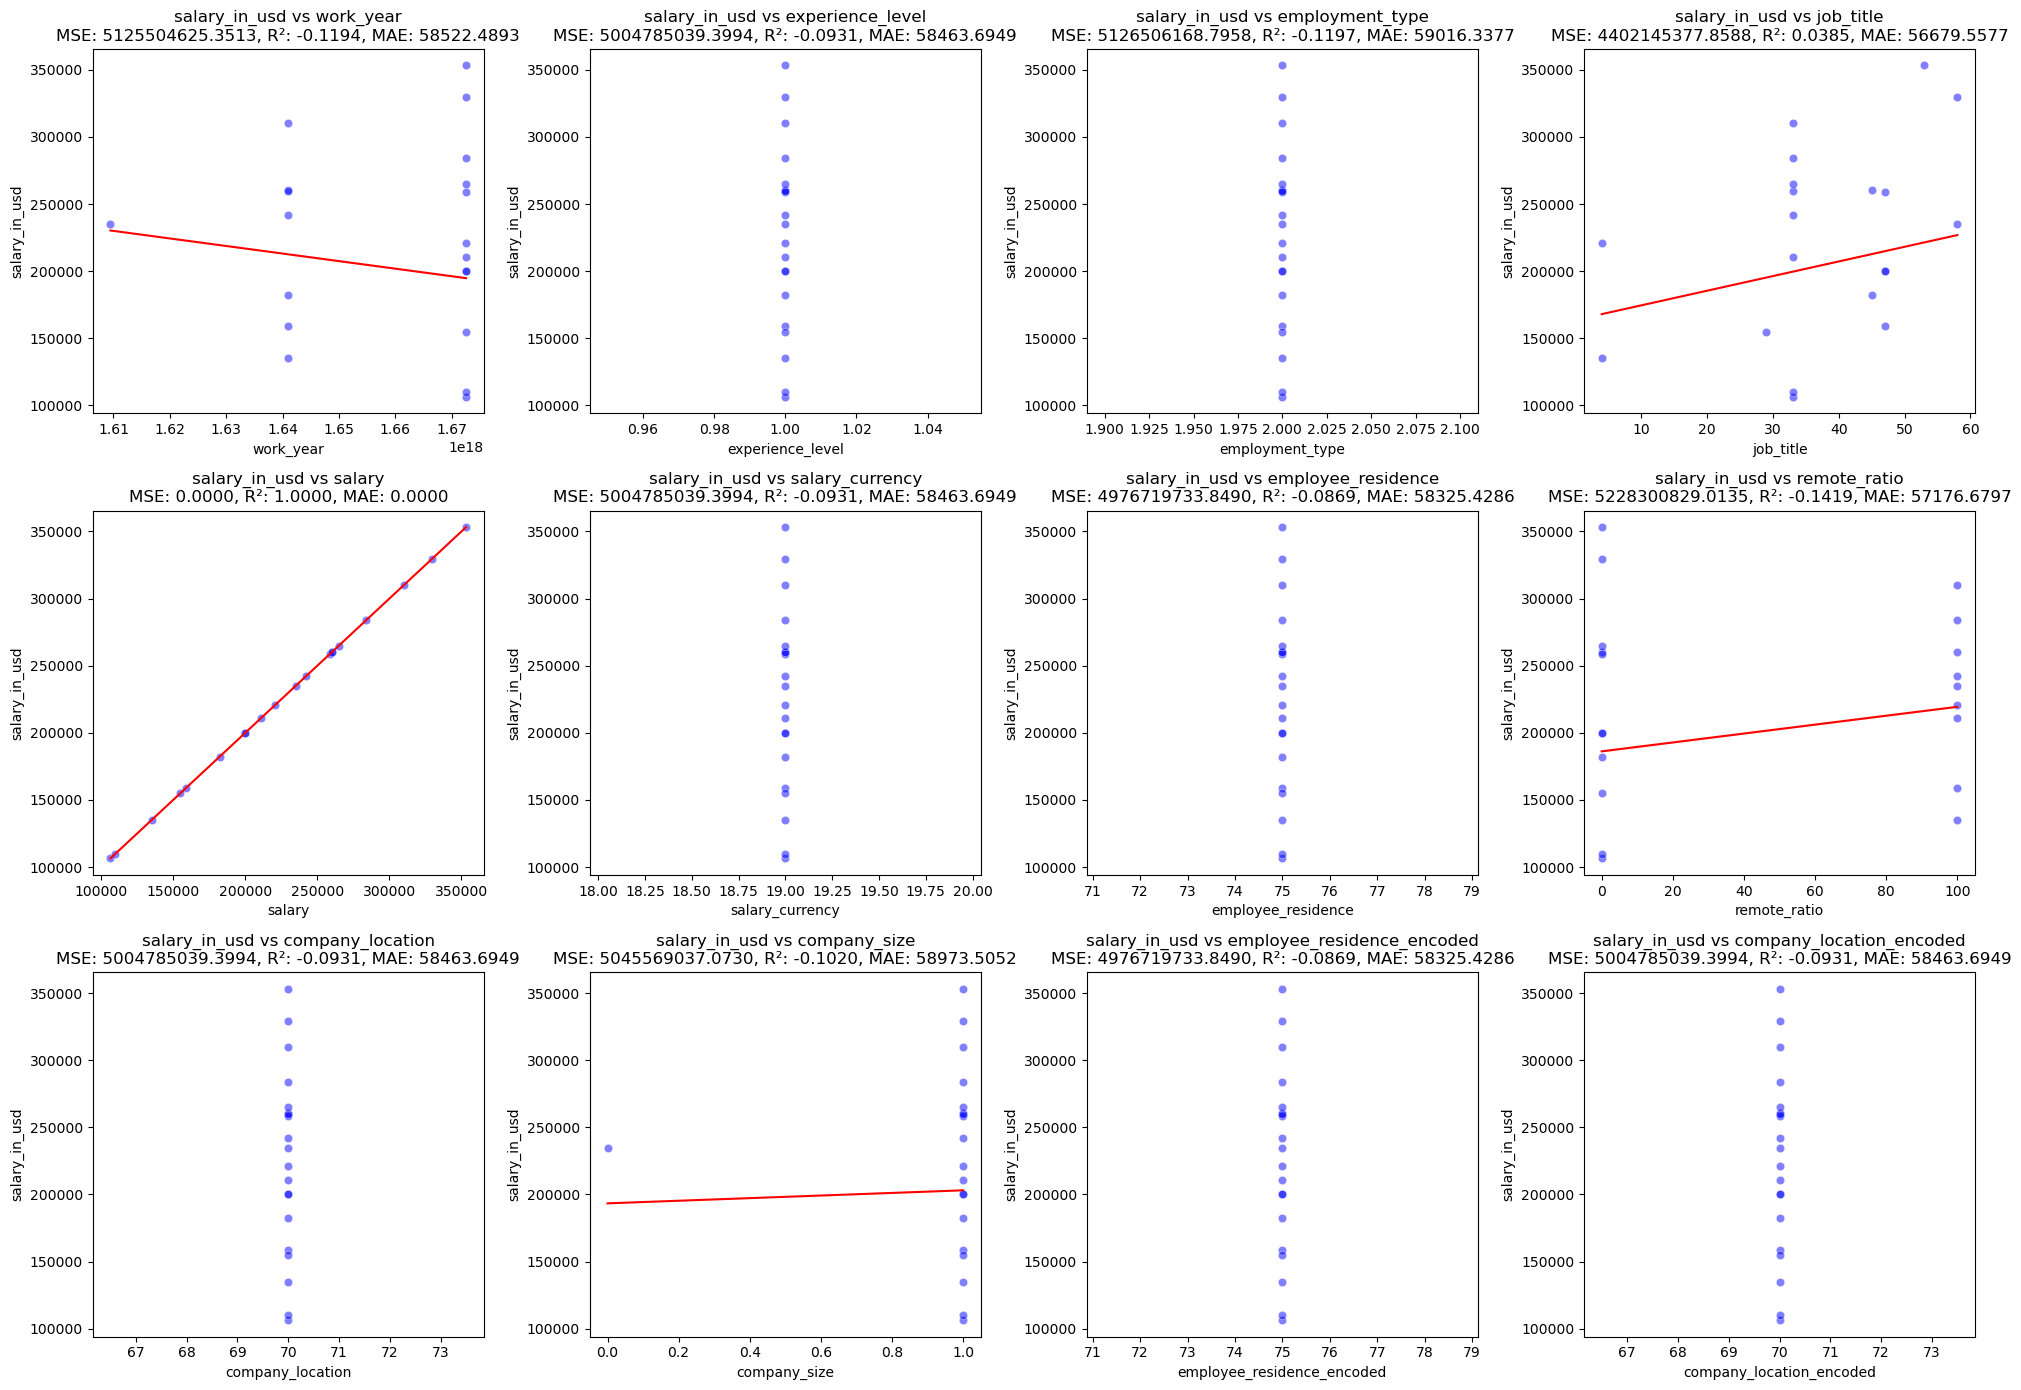

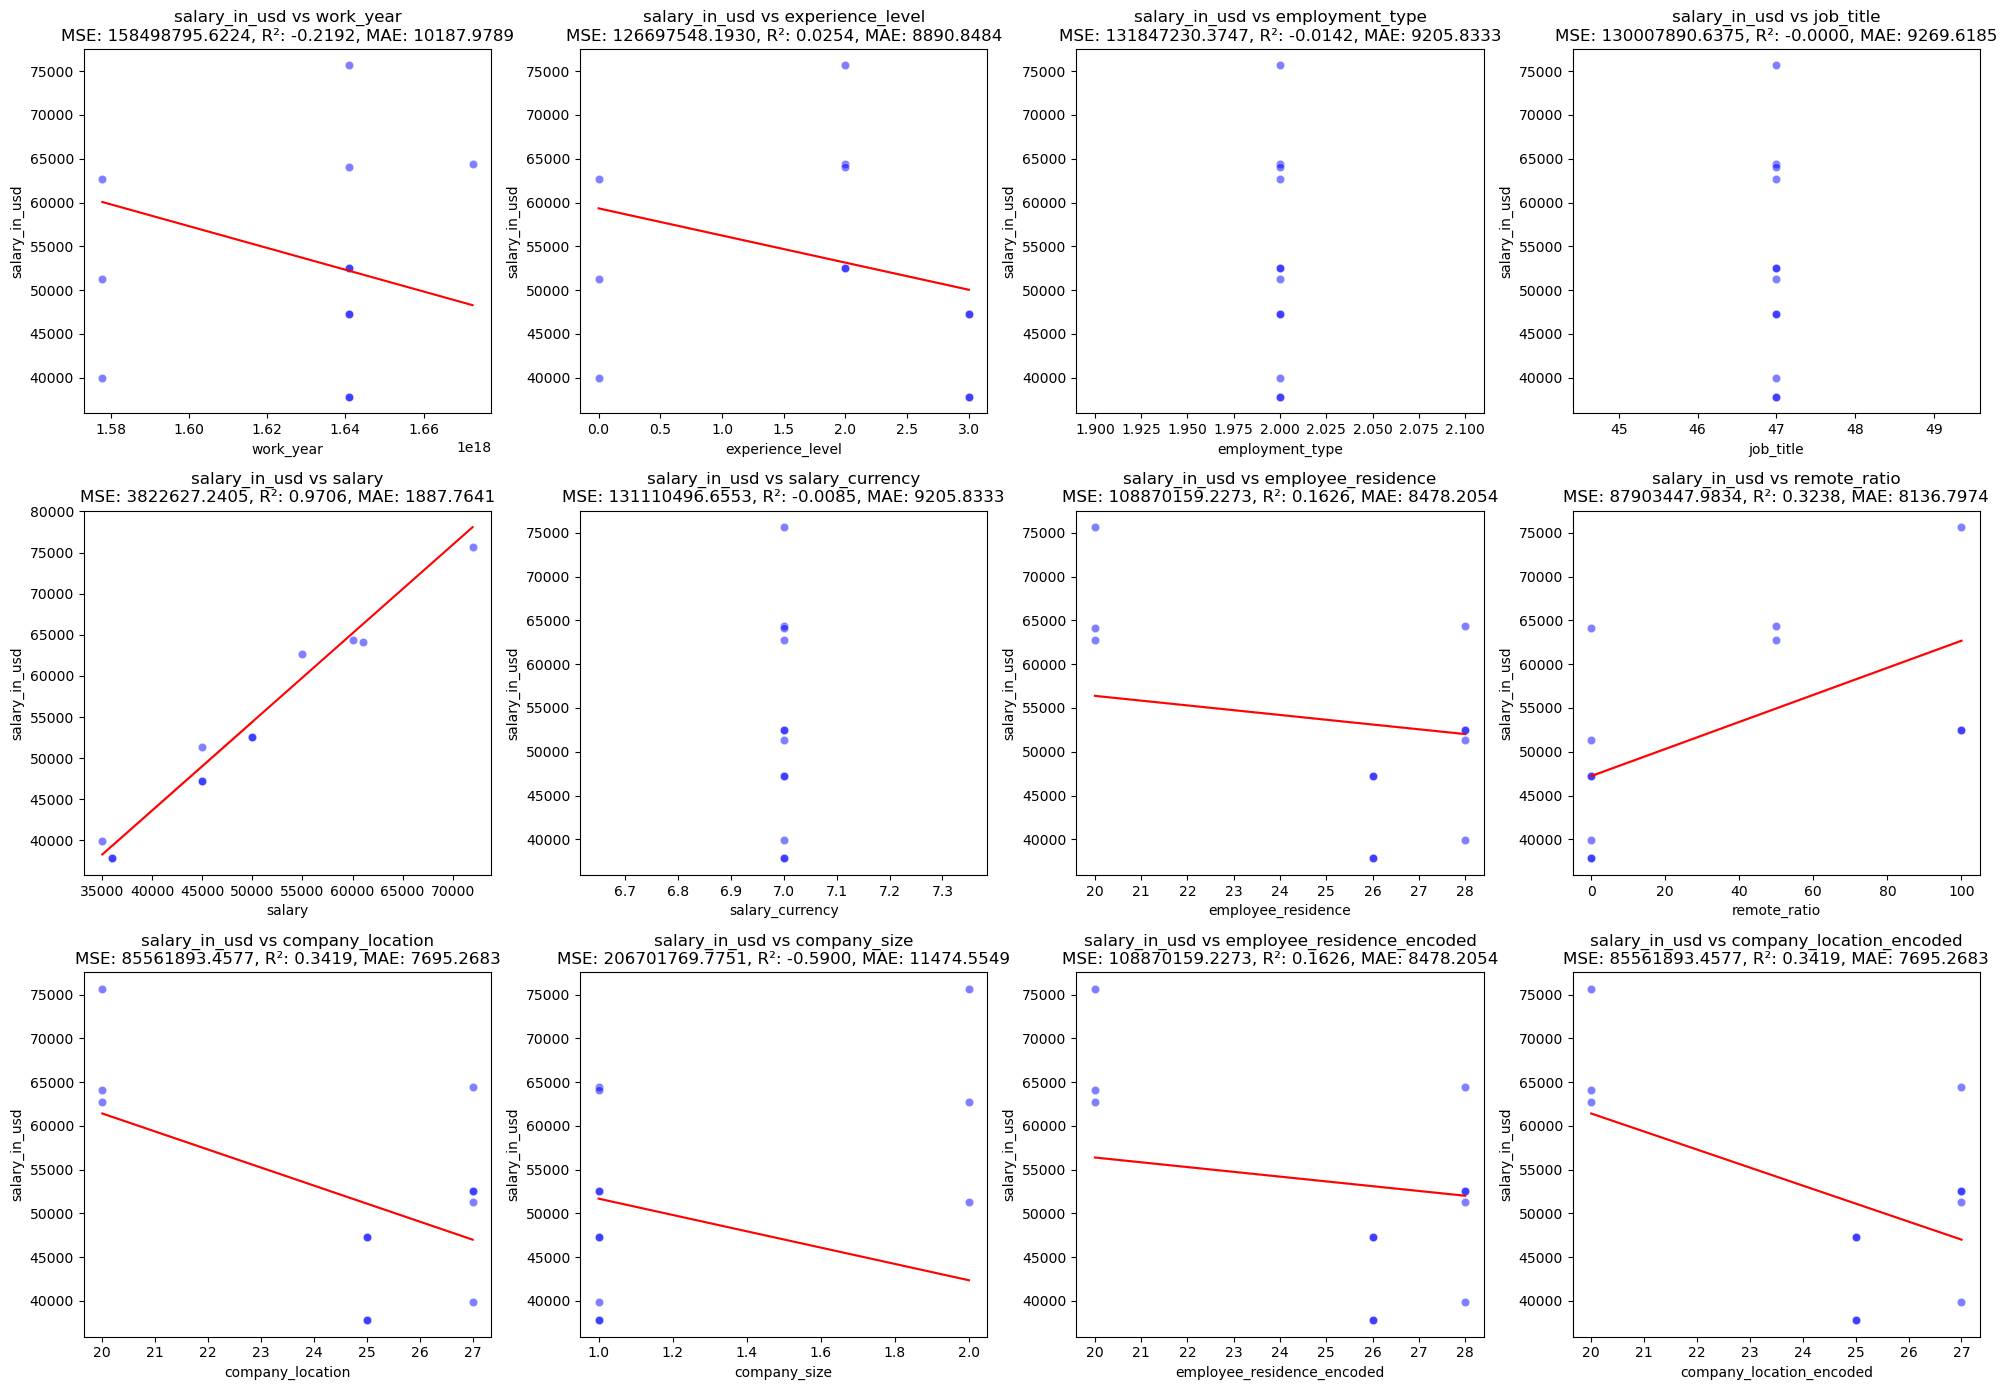

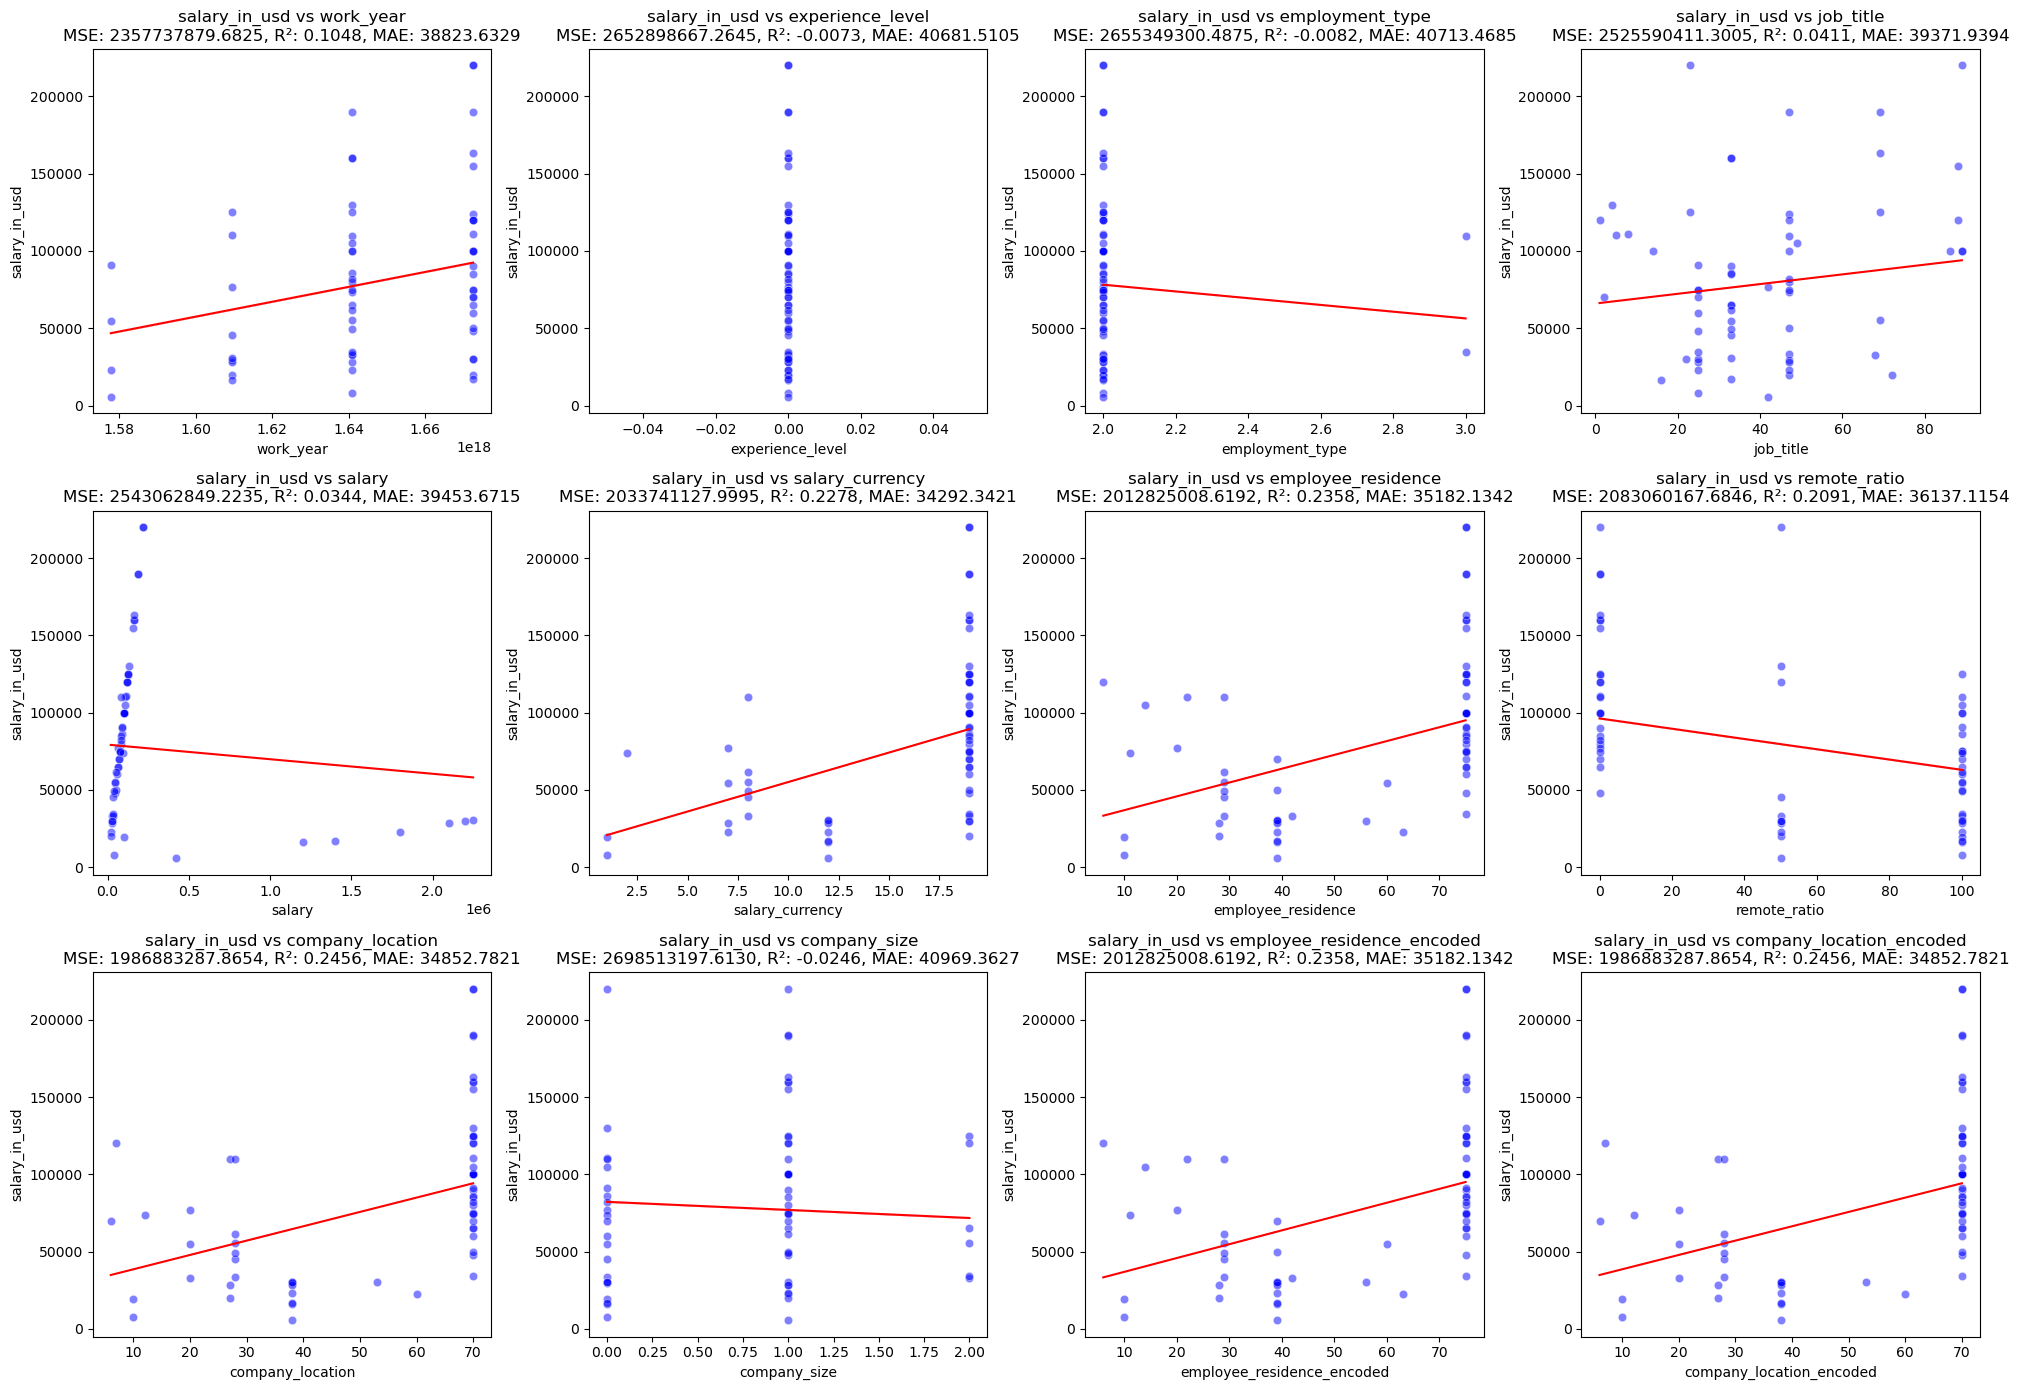

In [ ]:
colonnes_explicatives = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'employee_residence_encoded', 'company_location_encoded']
variable_cible = 'salary_in_usd'
data1 = cadresUS_regr[colonnes_explicatives + [variable_cible]]

plt.figure(figsize=(20, 14))
for i, col in enumerate(colonnes_explicatives):
    X1 = data1[[col]]
    Y1 = data1[variable_cible]

    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state=42, test_size=0.20)

    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)

    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=X_test[col], y=Y_test, color='blue', alpha=0.5)
    sns.lineplot(x=X_test[col], y=predictions, color='red')
    plt.title(f'{variable_cible} vs {col}\nMSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}')
    plt.xlabel(col)
    plt.ylabel(variable_cible)

plt.tight_layout()
plt.show()

colonnes_explicatives = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'employee_residence_encoded', 'company_location_encoded']
variable_cible = 'salary_in_usd'
data2 = datascientist_FRESDE[colonnes_explicatives + [variable_cible]]

plt.figure(figsize=(20, 14))
for i, col in enumerate(colonnes_explicatives):
    X2 = data2[[col]]
    Y2 = data2[variable_cible]

    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, random_state=42, test_size=0.20)

    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)

    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=X_test[col], y=Y_test, color='blue', alpha=0.5)
    sns.lineplot(x=X_test[col], y=predictions, color='red')
    plt.title(f'{variable_cible} vs {col}\nMSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}')
    plt.xlabel(col)
    plt.ylabel(variable_cible)

plt.tight_layout()
plt.show()

colonnes_explicatives = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'employee_residence_encoded', 'company_location_encoded']
variable_cible = 'salary_in_usd'
data3 = debutants_monde[colonnes_explicatives + [variable_cible]]

plt.figure(figsize=(20, 14))
for i, col in enumerate(colonnes_explicatives):
    X3 = data3[[col]]
    Y3 = data3[variable_cible]

    X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, random_state=42, test_size=0.20)

    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)

    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=X_test[col], y=Y_test, color='blue', alpha=0.5)
    sns.lineplot(x=X_test[col], y=predictions, color='red')
    plt.title(f'{variable_cible} vs {col}\nMSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}')
    plt.xlabel(col)
    plt.ylabel(variable_cible)

plt.tight_layout()
plt.show()

*   REGRESSIONS LINÉAIRES MULTIPLES POUR CHACUN DES 3 TABLEAUX + MSE R2 MAE DE CHAQUE TABLEAU.

MSE cadres USA : 5.358779870384349e-22
R2 ccadres USA: 1.0
MAE cadres USA: 1.5145870951973663e-11


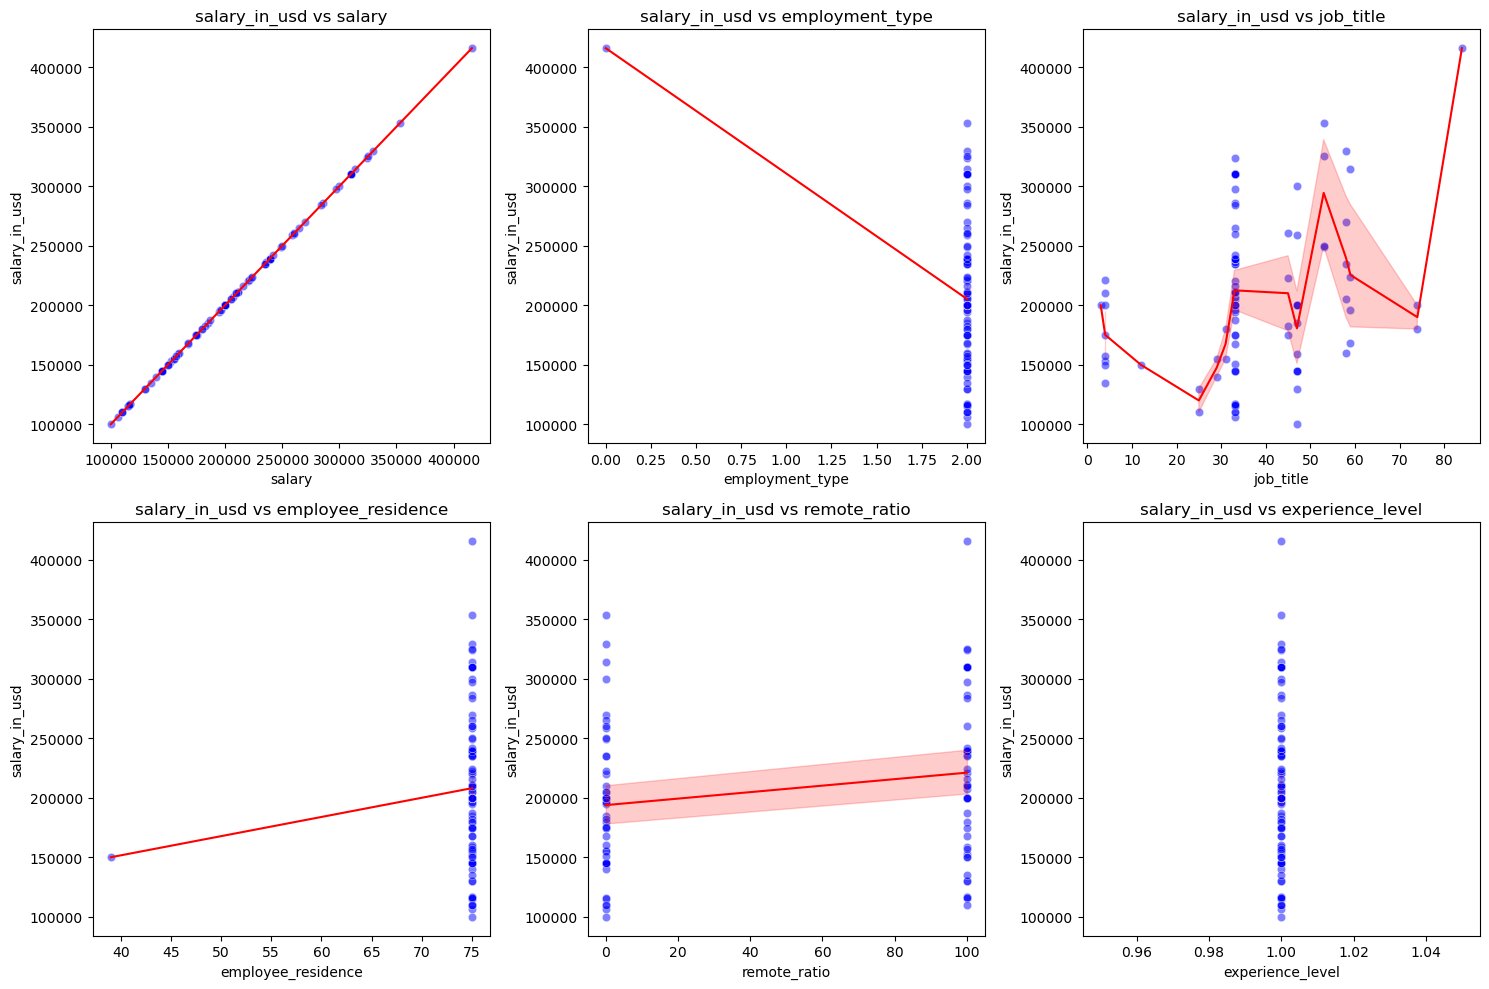

MSE datascientists FR ES DE : 6809091.54273039
R2 datascientists FR ES DE: 0.9777121196535893
MAE datascientists FR ES DE: 1973.8622315023576


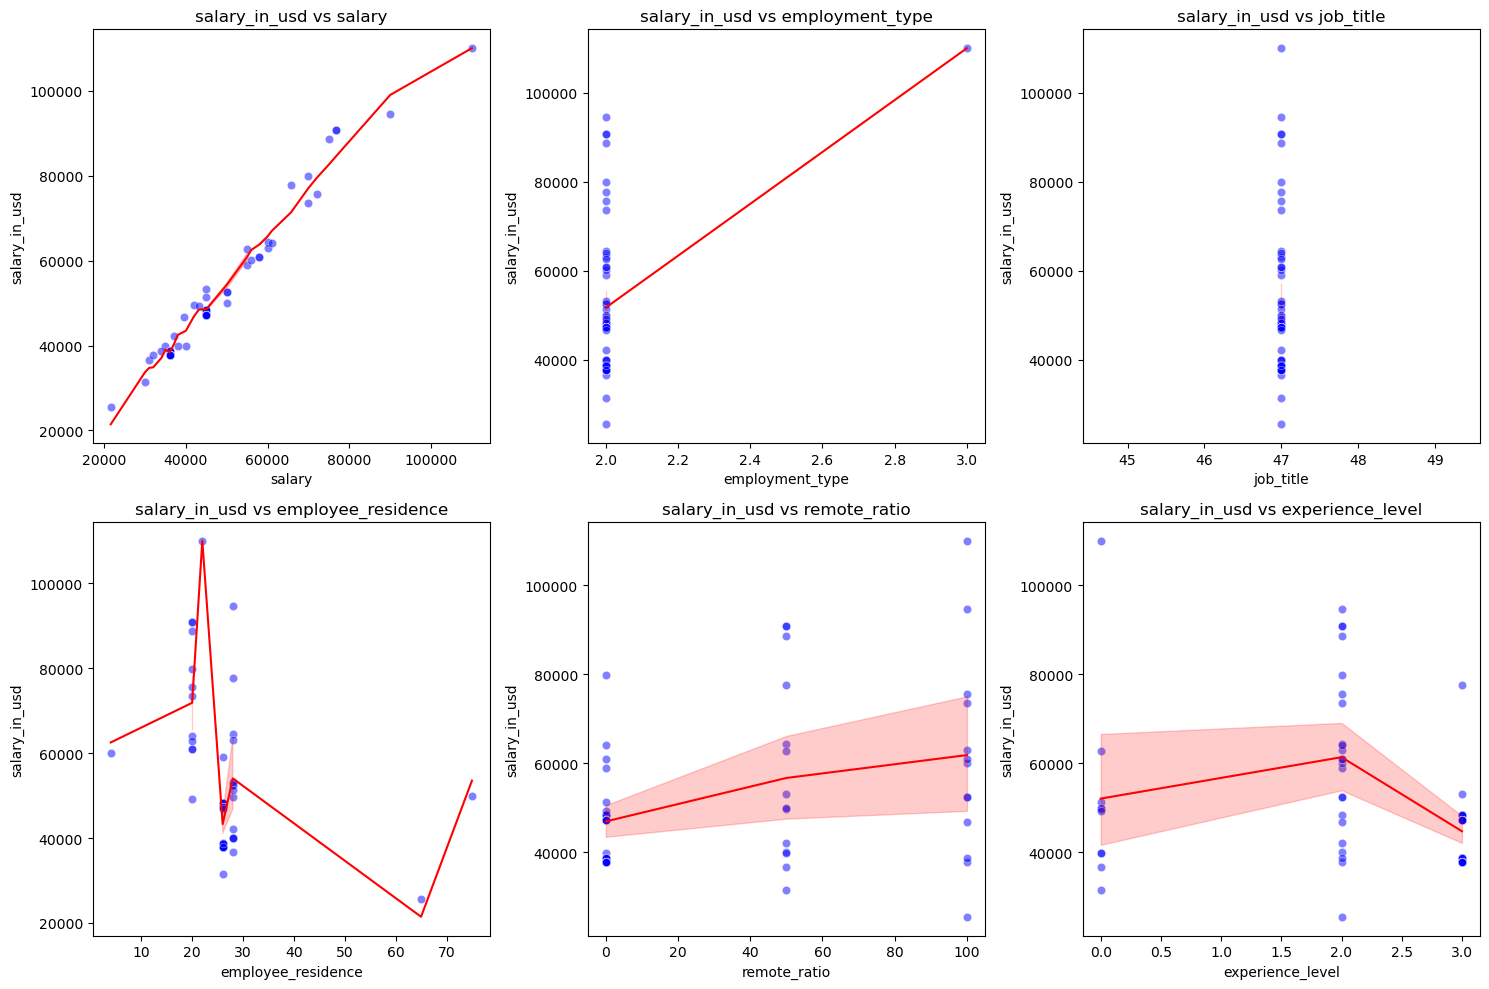

MSE debutants monde : 1973645862.3607528
R2 debutants monde : 0.27412043634929717
MAE debutants monde : 32468.709555687605


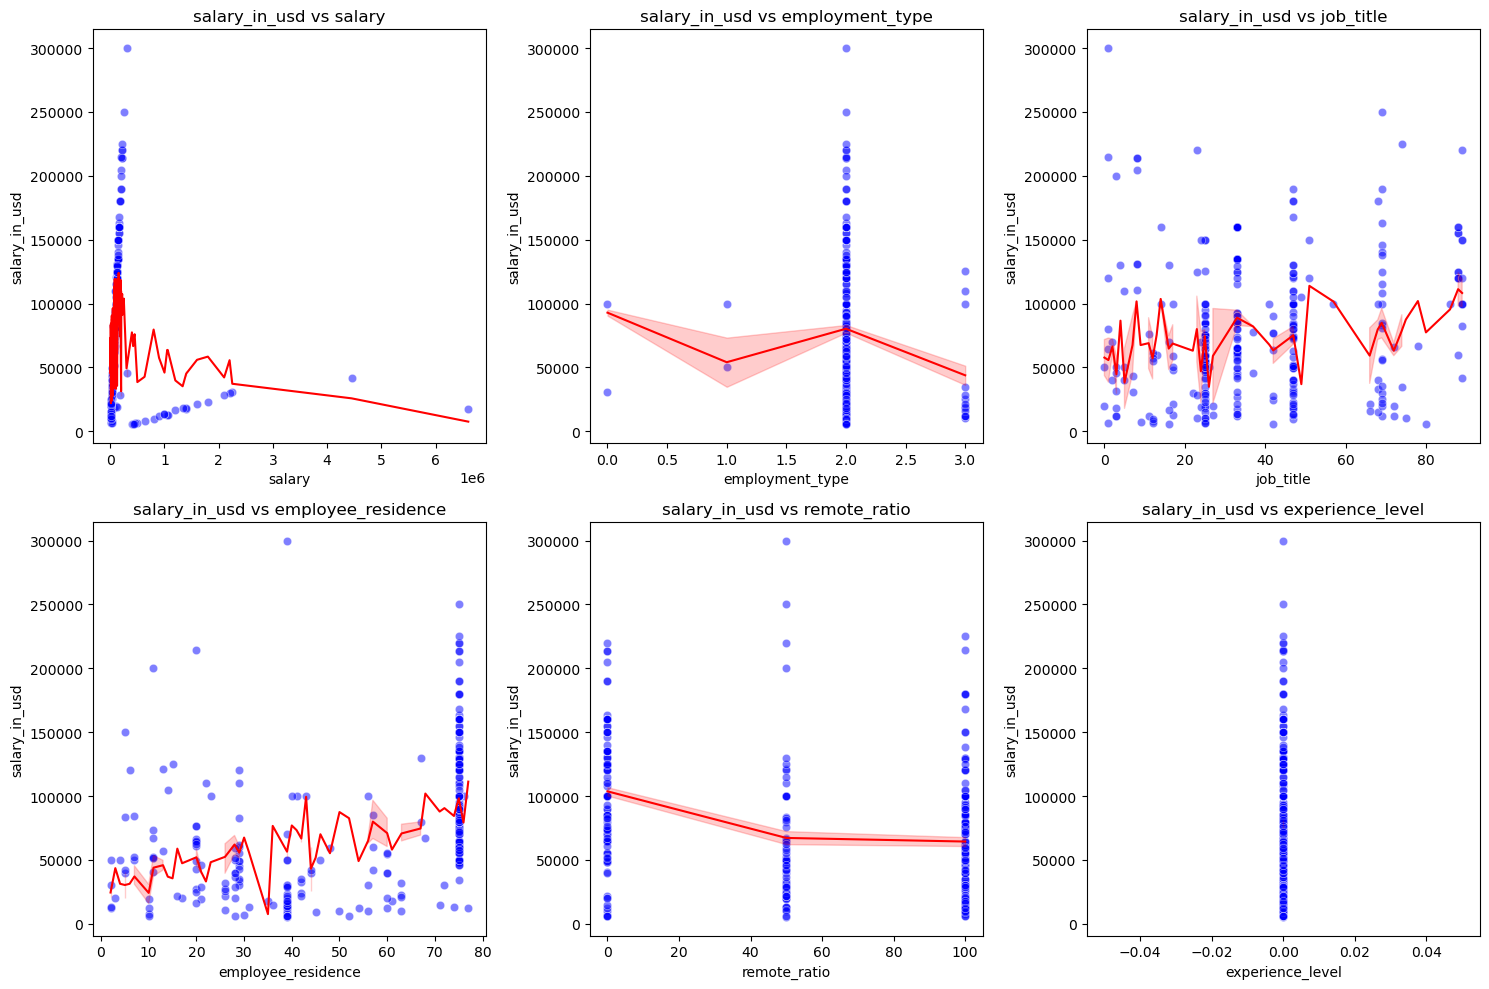

In [ ]:
colonnes_explicatives = ['salary', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'experience_level']
variable_cible = 'salary_in_usd'
data1 = cadresUS_regr[colonnes_explicatives + [variable_cible]]

X = data1[colonnes_explicatives]
Y = data1[variable_cible]
model = LinearRegression()
model.fit(X, Y)
predictions = model.predict(X)

mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)
mae = mean_absolute_error(Y, predictions)

print("MSE cadres USA :", mse)
print("R2 ccadres USA:", r2)
print("MAE cadres USA:", mae)

plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_explicatives):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data1[col], y=data1[variable_cible], color='blue', alpha=0.5)
    sns.lineplot(x=data1[col], y=predictions, color='red')
    plt.title(f'{variable_cible} vs {col}')
    plt.xlabel(col)
    plt.ylabel(variable_cible)

plt.tight_layout()
plt.show()

colonnes_explicatives = ['salary', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'experience_level']
variable_cible = 'salary_in_usd'
data2 = datascientist_FRESDE[colonnes_explicatives + [variable_cible]]

X2 = data2[colonnes_explicatives]
Y2 = data2[variable_cible]
model = LinearRegression()
model.fit(X2, Y2)
predictions = model.predict(X2)

mse = mean_squared_error(Y2, predictions)
r2 = r2_score(Y2, predictions)
mae = mean_absolute_error(Y2, predictions)

print("MSE datascientists FR ES DE :", mse)
print("R2 datascientists FR ES DE:", r2)
print("MAE datascientists FR ES DE:", mae)

plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_explicatives):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data2[col], y=data2[variable_cible], color='blue', alpha=0.5)
    sns.lineplot(x=data2[col], y=predictions, color='red')
    plt.title(f'{variable_cible} vs {col}')
    plt.xlabel(col)
    plt.ylabel(variable_cible)

plt.tight_layout()
plt.show()

colonnes_explicatives = ['salary', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'experience_level']
variable_cible = 'salary_in_usd'
data3 = debutants_monde[colonnes_explicatives + [variable_cible]]

X3 = data3[colonnes_explicatives]
Y3 = data3[variable_cible]
model = LinearRegression()
model.fit(X3, Y3)
predictions = model.predict(X3)

mse = mean_squared_error(Y3, predictions)
r2 = r2_score(Y3, predictions)
mae = mean_absolute_error(Y3, predictions)

print("MSE debutants monde :", mse)
print("R2 debutants monde :", r2)
print("MAE debutants monde :", mae)

plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_explicatives):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data3[col], y=data3[variable_cible], color='blue', alpha=0.5)
    sns.lineplot(x=data3[col], y=predictions, color='red')
    plt.title(f'{variable_cible} vs {col}')
    plt.xlabel(col)
    plt.ylabel(variable_cible)

plt.tight_layout()
plt.show()

INTERPRETATION :    
*   MSE cadres USA : 2.5929580017988785e-23 R2 : 1.0  MAE : 1.7818671708204308e-12.
*   Regression linéaire multiple est bien adaptée pour les cadres USA vu les résultats.
*   MSE datascientists FR ES DE : 6809091.542730387 R2 : 0.9777121196535893 MAE : 1973.8622315023613.
*   R2 très proche de 1 pour les datascientists.
*   MSE debutants monde : 1973645862.3607528 R2  : 0.27412043634929717 MAE : 32468.709555687605.
*   Les valeurs sont pas très agrèables pour les débutants.

---



*    CLASSIFICATION : ON EFFECTUE LA CLASSIFICATION AVEC LE TABLEAU SANS 63 VAL ABERRANTES.

In [ ]:
nouveau_tableau = datascience2_sans_top63
nouveau_tableau_encoded = nouveau_tableau.copy()
colonnes_catégoriques = ['work_year', 'experience_level', 'employment_type', 'job_title','salary_currency', 'employee_residence', 'company_location', 'company_size']
label_encoder = LabelEncoder()
for colonne in colonnes_catégoriques:
    nouveau_tableau_encoded[colonne] = label_encoder.fit_transform(nouveau_tableau_encoded[colonne])

*    CLASSIFICATION UNIQUEMENT GRACE AUX SALARIÉS DE 2023 QUI SONT SUFFISAMENT NOMBREUX (1747) POUR DÉCRIRE LES SALAIRES DE 2024.

(1747, 13)
   work_year  experience_level  employment_type  job_title  salary  \
0          3                 3                2         83   80000   
1          3                 2                0         65   30000   
2          3                 2                0         65   25500   
3          3                 3                2         46  175000   
4          3                 3                2         46  120000   

   salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0                7          85847                  26           100   
1               18          30000                  74           100   
2               18          25500                  74           100   
3               18         175000                  11           100   
4               18         120000                  11           100   

   company_location  company_size  employee_residence_encoded  \
0                25             0                          26   
1          

C:\Users\famezziane\AppData\Local\Temp\ipykernel_5392\3516972293.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouveau_tableau_2023['salary_category'] = nouveau_tableau_2023['salary_in_usd'].apply(categoriser_salaire)


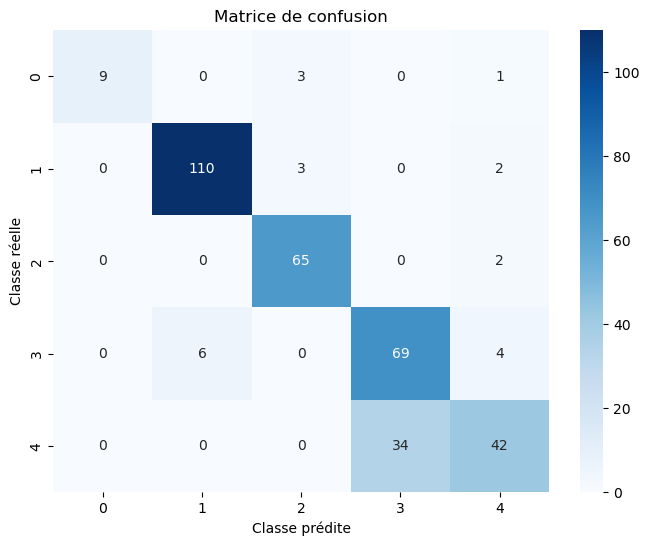

In [ ]:
nouveau_tableau_2023 = nouveau_tableau_encoded[nouveau_tableau_encoded['work_year'] == 3]
print(nouveau_tableau_2023.shape)

seuil_1 = 95000
seuil_2 = 135000
seuil_3 = 175000
seuil_4 = 250000

# Fonction pour catégoriser les salaires en fonction des seuils
def categoriser_salaire(salaire):
    if salaire < seuil_1:
        return 'Moins de 95k$ annuel'
    elif seuil_1 <= salaire < seuil_2:
        return 'Entre 95k$ et 135k$ annuel'
    elif seuil_2 <= salaire < seuil_3:
        return 'Entre 135k$ et 175k$ annuel'
    elif seuil_3 <= salaire < seuil_4:
        return 'Entre 175k$ et 250k$ annuel'
    else:
        return '+ de 250k$ annuel'

# Appliquer la fonction de catégorisation pour créer une nouvelle colonne 'salary_category'
nouveau_tableau_2023['salary_category'] = nouveau_tableau_2023['salary_in_usd'].apply(categoriser_salaire)
nouveau_tableau_2023_encoded = nouveau_tableau_2023.copy()
colonnes_catégoriques = ['salary_category']
label_encoder = LabelEncoder()
for colonne in colonnes_catégoriques:
    nouveau_tableau_2023_encoded[colonne] = label_encoder.fit_transform(nouveau_tableau_2023_encoded[colonne])

# Afficher les premières lignes du DataFrame pour vérifier la nouvelle colonne
print(nouveau_tableau_2023_encoded.head())

X = nouveau_tableau_2023_encoded.drop('salary_in_usd', axis=1)
y = nouveau_tableau_2023_encoded['salary_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# VISUALISATION : MATRICE DE CONFUSION

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
predictions = naive_bayes_model.predict(X_test)

print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()

INTERPRETATION :    
*   Cette matrice de confusion affiche les résultats de notre modèle de classification, en comparant les prédictions avec les valeurs réelles de notre ensemble de test.
*   Classe prédite (axe des x) : Ce sont les classes que le modèle a prédité pour les échantillons de l'ensemble de test.
*   Classe réelle (axe des y) : Ce sont les classes réelles des échantillons de l'ensemble de test.
*   Les vrais positifs ou TP (true positive) : Ce sont les cas où le modèle a correctement prédit une classe positive. Ces valeurs sont situées sur la diagonale principale de la matrice.
*   Les faux positifs ou FP (false positive) : Ce sont les cas où le modèle a prédit faussement une classe positive alors que la classe réelle était négative. Ces valeurs se trouvent dans les colonnes qui ne correspondent pas à la classe réelle, mais qui correspondent à la classe prédite.